<a href="https://colab.research.google.com/github/jeanlucjackson/w266_final_project/blob/main/code/sandboxes/JJ/analyze_evaluations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Google Drive

In [3]:
from os import listdir
from os.path import isfile, join

import csv
import json
from pprint import pprint

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# This cell will authenticate you and mount your Drive in the Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
inference_root = "/content/drive/MyDrive/w266 NLP Final Project/Predictions/"
evaluation_root = "/content/drive/MyDrive/w266 NLP Final Project/Evaluation/"

# Load Results

## From `evaluation_dict`

In [6]:
# Standard filename for `evaluation_dict` saved in Google Drive
filename = join(evaluation_root, "evaluation_dict.json")

# Read JSON into dictionary
with open(filename) as json_file:
    evaluation_dict = json.load(json_file)

In [7]:
# Separate LISTS of results from CALCULATED AVERAGES results
series_dict = {}
value_dict = {}

# Loop through datasets
for dataset, metrics in evaluation_dict.items():
  
  # Loop through metrics and separate "_series" items
  for metric, value in metrics.items():
    
    # If it's a "series" item, add to `series_dict`
    if metric.split('_')[-1].strip() == 'series':

      # If this dataset does not yet exist in `series_dict`, add it:
      if not series_dict.get(dataset):
        series_dict.update(
            {dataset: {metric: value}}
        )
      # If this dataset already exists in `series_dict`, add metric to it:
      else:
        series_dict[dataset].update(
            {metric: value}
        )

    # If not a "series" item then it's a calculated value
    else:

      # If this dataset does not yet exist in `value_dict`, add it:
      if not value_dict.get(dataset):
        value_dict.update(
            {dataset: {metric: value}}
        )
      # If this dataset already exists in `value_dict`, add metric to it:
      else:
        value_dict[dataset].update(
            {metric: value}
        )


In [8]:
# for k, v in series_dict.items():
#   print(k)
#   print('    ', end='')
#   for k, v in v.items():
#     print(f"{k}: ({len(v)})", end=' ')
#   print()

In [9]:
# for k, v in value_dict.items():
#   print(k)
#   print('    ', end='')
#   for k, v in v.items():
#     print(f"{k}: {v}", end=' ')
#   print()

In [10]:
# Load value_dict into DataFrame
value_df = pd.DataFrame.from_dict(value_dict, orient='index')
print(f"{value_df.shape[0]} datasets and {value_df.shape[1]} metrics")

value_df = value_df.reset_index()\
                       .rename(columns={'index': 'filename'})

# Parse filename into metadata columns
value_df['base_model'] = value_df.apply(lambda row: row['filename'].split('.')[1], axis=1)
value_df['trained_on'] = value_df.apply(lambda row: row['filename'].split('.')[2], axis=1)
value_df['tested_on'] = value_df.apply(lambda row: row['filename'].split('.')[3], axis=1)
value_df['nickname'] = value_df.apply(lambda row: f"{row['base_model'].split('_')[0]}_{row['trained_on']}_{row['tested_on']}", axis=1)

40 datasets and 9 metrics


In [11]:
value_df.columns

Index(['filename', 'bleu', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'meteor',
       'bertscore-precision', 'bertscore-recall', 'bertscore-f1', 'base_model',
       'trained_on', 'tested_on', 'nickname'],
      dtype='object')

In [12]:
value_df.head()

,filename,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,base_model,trained_on,tested_on,nickname
0,predictions.bart_base_pt_long.nq.nq.csv,"[0.0, 0.6803749333171202, 0.0, 0.0, 0.0, 0.643...","[0.6666666666666665, 0.75, 0.47058823529411764...","[0.375, 0.7142857142857143, 0.1333333333333333...","[0.6666666666666665, 0.75, 0.47058823529411764...","[0.6666666666666665, 0.75, 0.47058823529411764...","[0.6233062330623306, 0.864795918367347, 0.3546...","[0.9106557369232178, 0.9475241899490356, 0.848...","[0.9210629463195801, 0.9174776077270508, 0.822...","[0.9158297777175903, 0.9322589039802551, 0.835...",bart_base_pt_long,nq,nq,bart_nq_nq
1,predictions.bart_base_pt_long.nq.quac.csv,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2222222222222222, 0.23529411764705882, 0.28...","[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.2222222222222222, 0.23529411764705882, 0.14...","[0.2222222222222222, 0.23529411764705882, 0.14...","[0.18939393939393942, 0.1111111111111111, 0.12...","[0.77193683385849, 0.6600598096847534, 0.68471...","[0.7577263116836548, 0.7046704292297363, 0.682...","[0.7647655606269836, 0.6816360354423523, 0.683...",bart_base_pt_long,nq,quac,bart_nq_quac
2,predictions.bart_base_pt_long.nq.squad.csv,"[0.26708679784499234, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.5263157894736842, 0.37499999999999994, 0.37...","[0.47058823529411764, 0.14285714285714285, 0.0...","[0.5263157894736842, 0.37499999999999994, 0.25...","[0.5263157894736842, 0.37499999999999994, 0.25...","[0.503030303030303, 0.4323630136986301, 0.1685...","[0.845791220664978, 0.8020835518836975, 0.8278...","[0.8335225582122803, 0.8139801025390625, 0.811...","[0.8396120667457581, 0.8079881072044373, 0.819...",bart_base_pt_long,nq,squad,bart_nq_squad
3,predictions.bart_base_pt_long.nq.triviaqa.csv,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2608695652173913, 0.23529411764705882, 0.25...","[0.09523809523809525, 0.0, 0.06896551724137931...","[0.2608695652173913, 0.11764705882352941, 0.12...","[0.2608695652173913, 0.11764705882352941, 0.12...","[0.17624521072796934, 0.10309278350515463, 0.0...","[0.7433484196662903, 0.7695457339286804, 0.812...","[0.7070193886756897, 0.7620754241943359, 0.740...","[0.7247289419174194, 0.7657923102378845, 0.774...",bart_base_pt_long,nq,triviaqa,bart_nq_triviaqa
4,predictions.bart_base_pt_long.quac.nq.csv,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.625, 0.0, 0.0, 0.3076923076923077, 0.307692...","[0.42857142857142855, 0.0, 0.0, 0.0, 0.1818181...","[0.625, 0.0, 0.0, 0.3076923076923077, 0.307692...","[0.625, 0.0, 0.0, 0.3076923076923077, 0.307692...","[0.5506172839506173, 0.06329113924050632, 0.0,...","[0.8304258584976196, 0.6681983470916748, 0.664...","[0.8426690101623535, 0.6493955254554749, 0.669...","[0.8365026712417603, 0.6586627960205078, 0.667...",bart_base_pt_long,quac,nq,bart_quac_nq


In [13]:
value_df.groupby('trained_on').size()

trained_on
amalgam     8
nq          8
quac        8
squad       8
triviaqa    8
dtype: int64

In [14]:
value_df.groupby('tested_on').size()

tested_on
nq          10
quac        10
squad       10
triviaqa    10
dtype: int64

## From `evaluation_database`

In [15]:
evaluate_db_snqt_filename = 'evaluation_database_snqt.json'
evaluate_db_filename = 'evaluation_database.json'
filename = join(evaluation_root, evaluate_db_filename)

# Read JSON into dataframe
evaluation_db_df = pd.read_json(filename)

In [16]:
evaluation_db_df.shape

(286290, 19)

In [17]:
evaluation_db_df.groupby(['prediction_set', 'nickname']).size()

prediction_set                                       nickname              
predictions.T5_base_pt_long.amalgam.nq.csv           T5_amalgam_nq              2356
predictions.T5_base_pt_long.amalgam.quac.csv         T5_amalgam_quac            5868
predictions.T5_base_pt_long.amalgam.squad.csv        T5_amalgam_squad          10570
predictions.T5_base_pt_long.amalgam.triviaqa.csv     T5_amalgam_triviaqa        9835
predictions.T5_base_pt_long.nq.nq.csv                T5_nq_nq                   2356
predictions.T5_base_pt_long.nq.quac.csv              T5_nq_quac                 5868
predictions.T5_base_pt_long.nq.squad.csv             T5_nq_squad               10570
predictions.T5_base_pt_long.nq.triviaqa.csv          T5_nq_triviaqa             9835
predictions.T5_base_pt_long.quac.nq.csv              T5_quac_nq                 2356
predictions.T5_base_pt_long.quac.quac.csv            T5_quac_quac               5868
predictions.T5_base_pt_long.quac.squad.csv           T5_quac_squad        

In [18]:
evaluation_db_df.head()

,prediction_set,base_model,trained_on,tested_on,nickname,hyperparameter,context,target,prediction,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,use
0,predictions.bart_base_pt_long.nq.nq.csv,bart,nq,nq,bart_nq_nq,{'defaults': True},Following the unification of the Hejaz and Ne...,what was the real name of saudi arabia,what is the name of the kingdom of saudi arabia,0.000000,0.666667,0.375000,0.666667,0.666667,0.623306,0.910656,0.921063,0.915830,0.794086
1,predictions.bart_base_pt_long.nq.nq.csv,bart,nq,nq,bart_nq_nq,{'defaults': True},This list contains the top ten pictures with ...,whats the most liked picture on instagram 2018,what is the most liked picture on instagram,0.680375,0.750000,0.714286,0.750000,0.750000,0.864796,0.947524,0.917478,0.932259,0.884909
2,predictions.bart_base_pt_long.nq.nq.csv,bart,nq,nq,bart_nq_nq,{'defaults': True},Alice Bowman (Meg Ryan) moves to the (fiction...,where does the movie proof of life take place,where does alice go in the new movie,0.000000,0.470588,0.133333,0.470588,0.470588,0.354635,0.848356,0.822430,0.835192,0.517866
3,predictions.bart_base_pt_long.nq.nq.csv,bart,nq,nq,bart_nq_nq,{'defaults': True},A common synonym for net profit when discussi...,where is net profit on the balance sheet,where does net profit come from in a financial...,0.000000,0.333333,0.125000,0.333333,0.333333,0.311653,0.846695,0.865777,0.856130,0.728012
4,predictions.bart_base_pt_long.nq.nq.csv,bart,nq,nq,bart_nq_nq,{'defaults': True},"Human fingerprints are detailed, nearly uniqu...",when was fingerprinting first used by the police,when was fingerprint technology first used in ...,0.000000,0.588235,0.266667,0.588235,0.588235,0.694444,0.876308,0.876399,0.876353,0.704206


In [19]:
# Validate database

assert evaluation_db_df.isnull().values.any() == False, 'Missing values'

evaluation_db_df[(evaluation_db_df.prediction_set == 'predictions.bart_base_pt_long.amalgam.quac.beams.csv')]

# datasets = evaluation_db_df.prediction_set.tolist()
# for ds in datasets:
# loop through and check if each dataset has any null values

,prediction_set,base_model,trained_on,tested_on,nickname,hyperparameter,context,target,prediction,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,use


In [20]:
evaluation_db_df[['nickname', 'rougeL', 'bleu', 'meteor', 'bertscore-f1', 'use']].describe()

,rougeL,bleu,meteor,bertscore-f1,use
count,286290.000000,286290.000000,286290.000000,286290.000000,286290.000000
mean,0.295583,0.048842,0.279015,0.789801,0.483113
std,0.233494,0.158423,0.234177,0.082735,0.246386
min,0.000000,0.000000,0.000000,0.521592,-0.147977
25%,0.125000,0.000000,0.097087,0.729552,0.291765
50%,0.250000,0.000000,0.200000,0.784537,0.487792
75%,0.428571,0.000000,0.408791,0.845546,0.671069
max,1.000000,1.000000,0.999937,1.000000,1.000000


# 11/27

## correlation

In [21]:
evaluation_db_df[['bleu', 'rougeL', 'meteor', 'bertscore-f1', 'use']].corr()

,bleu,rougeL,meteor,bertscore-f1,use
bleu,1.000000,0.631534,0.647967,0.547183,0.463350
rougeL,0.631534,1.000000,0.918627,0.857186,0.800439
meteor,0.647967,0.918627,1.000000,0.855458,0.773481
bertscore-f1,0.547183,0.857186,0.855458,1.000000,0.853621
use,0.463350,0.800439,0.773481,0.853621,1.000000


In [22]:
evaluation_db_df.columns

Index(['prediction_set', 'base_model', 'trained_on', 'tested_on', 'nickname',
       'hyperparameter', 'context', 'target', 'prediction', 'bleu', 'rouge1',
       'rouge2', 'rougeL', 'rougeLsum', 'meteor', 'bertscore-precision',
       'bertscore-recall', 'bertscore-f1', 'use'],
      dtype='object')

In [23]:
df_norm = evaluation_db_df[
    ['base_model', 'trained_on', 'tested_on', 'nickname',
     'context', 'target', 'prediction', 'bleu', 'rougeL', 'meteor', 'bertscore-f1', 'use']
]
print(df_norm.shape)

df_norm['bleu_norm'] = (df_norm.bleu - df_norm.bleu.mean()) / df_norm.bleu.std()
df_norm['rougeL_norm'] = (df_norm.rougeL - df_norm.rougeL.mean()) / df_norm.rougeL.std()
df_norm['meteor_norm'] = (df_norm.meteor - df_norm.meteor.mean()) / df_norm.meteor.std()
df_norm['bertscore_norm'] = (df_norm['bertscore-f1'] - df_norm['bertscore-f1'].mean()) / df_norm['bertscore-f1'].std()
df_norm['use_norm'] = (df_norm.use - df_norm.use.mean()) / df_norm.use.std()

df_norm_metrics = df_norm[['bleu_norm', 'rougeL_norm', 'meteor_norm', 'bertscore_norm', 'use_norm']]

df_norm_metrics.head()

(286290, 12)


<ipython-input-23-f64fe3070328>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['bleu_norm'] = (df_norm.bleu - df_norm.bleu.mean()) / df_norm.bleu.std()
<ipython-input-23-f64fe3070328>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['rougeL_norm'] = (df_norm.rougeL - df_norm.rougeL.mean()) / df_norm.rougeL.std()
<ipython-input-23-f64fe3070328>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,bleu_norm,rougeL_norm,meteor_norm,bertscore_norm,use_norm
0,-0.308300,1.589265,1.470216,1.523287,1.262137
1,3.986372,1.946162,2.501441,1.721863,1.630757
2,-0.308300,0.749506,0.322917,0.548633,0.141055
3,-0.308300,0.161675,0.139373,0.801704,0.993965
4,-0.308300,1.253361,1.773995,1.046143,0.897343


In [24]:
df_norm_metrics.describe()

,bleu_norm,rougeL_norm,meteor_norm,bertscore_norm,use_norm
count,2.862900e+05,286290.000000,2.862900e+05,2.862900e+05,2.862900e+05
mean,4.765245e-17,0.000000,-3.415092e-17,1.073769e-15,2.620885e-16
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.082997e-01,-1.265914,-1.191469e+00,-3.241785e+00,-2.561384e+00
25%,-3.082997e-01,-0.730568,-7.768799e-01,-7.282069e-01,-7.766141e-01
50%,-3.082997e-01,-0.195222,-3.374154e-01,-6.362190e-02,1.899164e-02
75%,-3.082997e-01,0.569558,5.541790e-01,6.737871e-01,7.628511e-01
max,6.003913e+00,3.016854,3.078532e+00,2.540641e+00,2.097876e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd39c0c1e80>,
      dtype=object)

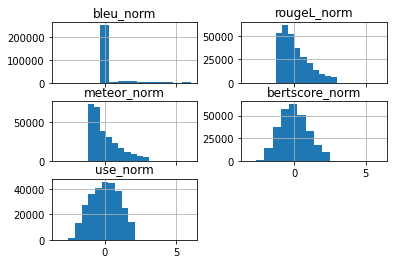

In [25]:
df_norm_metrics.hist(sharex=True, sharey=False)

In [26]:
df_norm_metrics.corr()

,bleu_norm,rougeL_norm,meteor_norm,bertscore_norm,use_norm
bleu_norm,1.000000,0.631534,0.647967,0.547183,0.463350
rougeL_norm,0.631534,1.000000,0.918627,0.857186,0.800439
meteor_norm,0.647967,0.918627,1.000000,0.855458,0.773481
bertscore_norm,0.547183,0.857186,0.855458,1.000000,0.853621
use_norm,0.463350,0.800439,0.773481,0.853621,1.000000


## specific ranges of metrics

In [ ]:
pd.options.display.max_colwidth
pd.options.display.max_colwidth = 500

In [ ]:
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'bleu_norm', 'rougeL_norm', 'meteor_norm', 'bertscore_norm', 'use_norm']
]

df = df[
    (df.bleu_norm > 0) &  # above average bleu
    (df.use_norm < 0)     # below average use
]

df = df.sort_values('bleu_norm', ascending=False)

display(df.shape)
df.head()

In [ ]:
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'bleu_norm', 'rougeL_norm', 'meteor_norm', 'bertscore_norm', 'use_norm']
]

df = df[
    (df.bleu_norm > 1) &  # bleu above 1 std
    (df.meteor_norm < 0)  # meteor below average
]

df = df.sort_values('meteor_norm', ascending=True)

display(df.shape)
df.head()

## Rich Questions

1. why we need more than METEOR for lexical analysis
2. if we need BOTH of BERTScore and USE for semantic analysis.

### Lexical Analysis

#### BLEU & METEOR

In [ ]:
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'bleu_norm', 'bleu', 'meteor_norm', 'meteor']
]

df = df[
    (df.bleu < 0.0001) # bleu = 0
]

print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")

df.sort_values('bleu', ascending=False).head(5)

In [ ]:
# BLEU & METEOR
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'bleu_norm', 'bleu', 'meteor_norm', 'meteor']
]

df = df[
    (df.bleu_norm > 1.5) &  # bleu above 1 std
    (df.meteor_norm < 0)  # meteor below average
]

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")
df.sample(5).sort_values('bleu', ascending=False)

We can see when BLEU is HIGH and METEOR is LOW, the predictions are generally low quality. There are overlapping words between target and prediction, but the precision-focus results in related questions that have a different focus.
___

In [ ]:
# BLEU & METEOR
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'bleu_norm', 'bleu', 'meteor_norm', 'meteor']
]

df = df[
    (df.bleu > 0) &  # > zero bleu
    (df.bleu < 0.15) &
    (df.meteor > 0.41)  # meteor 75th percentile
]

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")
df.sample(5).sort_values('meteor', ascending=False)

Conversely, we can see when METEOR is HIGH and BLEU is LOW, the predictions are generally higher quality.
___

In [ ]:
# BLEU & METEOR
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'bleu_norm', 'meteor_norm']
]

df = df[
    (df.bleu_norm > 1.0) &  # bleu above 1 std
    (df.meteor_norm > 1.0)  # meteor above 1 std
]

df = df.sort_values('meteor_norm', ascending=True)

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")
df.sample(5)

#### ROUGE & METEOR

In [ ]:
# ROUGE & METEOR
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'rougeL_norm', 'rougeL', 'meteor_norm', 'meteor']
]

df = df[
    (df.rougeL > 0.3) &    # rougeL above
    (df.meteor < 0.1)  # meteor below 25%
]

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")
df.sort_values('meteor', ascending=True).head(10)

In [ ]:
# ROUGE & METEOR
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'rougeL_norm', 'rougeL', 'meteor_norm', 'meteor']
]

df = df[
    (df.rougeL < 0.125) &    # rougeL below 25%
    (df.rougeL > 0) &
    (df.meteor > 0.41)  # meteor above 75
]

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")
df.sort_values('meteor', ascending=False).head(10)

In [ ]:
# ROUGE & METEOR
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'rougeL_norm', 'meteor_norm']
]

df = df[
    (df.rougeL_norm > 1.0) &  # rougeL above 1 std
    (df.meteor_norm > 1.0)    # meteor above 1 std
]

df = df.sort_values('meteor_norm', ascending=True)

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")
df.sample(5)

When ROUGE-L is HIGH and METEOR is LOW, typically the prediction reads well but will miss the point of the question.

When ROUGE-L is LOW and METEOR is HIGH, the prediction has a different word ordering but tends to capture the concept well and often reads well.

When BOTH are HIGH, predictions read well but sometimes miss the concept.

#### METEOR thresholds

In [ ]:
# METEOR
df = df_norm[
    ['nickname', 'context', 'target', 'prediction','meteor_norm', 'meteor']
]

df = df[
    (df.meteor > 0.2)
]

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")
df.sort_values('meteor', ascending=True).head(10)

### Semantic Analysis

#### USE & BERTScore

In [ ]:
# USE & BERTScore
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'bertscore-f1', 'use']
]

df = df[
    (df['bertscore-f1'] < 0.73) & # low bertscore 25
    (df.use > 0.671)         # high use 75
]

df_head = df.sort_values('use', ascending=False).head(20)

df_head['target_len'] = df_head.apply(lambda row: len(row['target'].split()), axis = 1)
df_head['predict_len'] = df_head.apply(lambda row: len(row['prediction'].split()), axis = 1)
print('target len:', df_head.target_len.mean())
print('predict len:', df_head.predict_len.mean())
df_head

In [ ]:
# USE & BERTScore
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'bertscore-f1', 'use']
]

df = df[
    (df['bertscore-f1'] > 0.846) & # high bertscore 75
    (df.use < 0.291)         # low use 25
]

df_head = df.sort_values('bertscore-f1', ascending=True).head(20)

df_head['target_len'] = df_head.apply(lambda row: len(row['target'].split()), axis = 1)
df_head['predict_len'] = df_head.apply(lambda row: len(row['prediction'].split()), axis = 1)
print('target len:', df_head.target_len.mean())
print('predict len:', df_head.predict_len.mean())
df_head

USE is generally better at capturing the overall concepts of a question than BERTScore. Both have higher scores associated with better written questions.

trying something...

In [ ]:
df_norm.target.sample(2)

In [ ]:
# USE & BERTScore
df = df_norm[
    ['nickname', 'trained_on', 'tested_on', 'context', 'target', 'prediction', 'bertscore-f1', 'use', 'bertscore_norm', 'use_norm']
]

# df = df[
#     (df.trained_on != 'quac') &
#     (df.tested_on != 'quac')
# ]

df_bert = df[
    (df.bertscore_norm > .5) &
    (df.use_norm < -.5)
]

df_use = df[
    (df.bertscore_norm < -.5) &
    (df.use_norm > .5)
]

word = 'blood'

df_bert = df_bert[
    (df_bert.target.apply(lambda x: word in [y.strip().strip('.').lower() for y in x.split()]))
]

df_use = df_use[
    (df_use.target.apply(lambda x: word in [y.strip().strip('.').lower() for y in x.split()]))
]

df_bert = df_bert.sort_values('bertscore-f1', ascending=False)
print(df_bert.shape)

df_use = df_use.sort_values('use', ascending=False)
print(df_use.shape)

display(df_bert.head(5))
display(df_use.head(5))

# Print entire text
with pd.option_context("max_colwidth", 1000):
    print(df_bert[["target", "prediction", 'bertscore-f1', 'use']].to_latex(index=False))

In [ ]:
# USE & BERTScore
df = df_norm[
    ['nickname', 'trained_on', 'tested_on', 'context', 'target', 'prediction', 'bertscore-f1', 'use', 'bertscore_norm', 'use_norm']
]

# df = df[
#     (df.trained_on != 'quac') &
#     (df.tested_on != 'quac')
# ]

df_bert = df[
    (df.bertscore_norm > .5) &
    (df.use_norm < -.5)
]

df_use = df[
    (df.bertscore_norm < -.5) &
    (df.use_norm > .5)
]

word = 'king'

df_bert = df_bert[
    (df_bert.target.apply(lambda x: word in [y.strip().strip('.').lower() for y in x.split()]))
]

df_use = df_use[
    (df_use.target.apply(lambda x: word in [y.strip().strip('.').lower() for y in x.split()]))
]

df_bert = df_bert.sort_values('bertscore-f1', ascending=False)
print(df_bert.shape)

df_use = df_use.sort_values('use', ascending=False)
print(df_use.shape)

display(df_bert.head(5))
display(df_use.head(5))

# Print entire text
with pd.option_context("max_colwidth", 1000):
    print(df_bert[["target", "prediction", 'bertscore-f1', 'use']].to_latex(index=False))

In [ ]:
# USE & BERTScore
df = df_norm[
    ['nickname', 'trained_on', 'tested_on', 'context', 'target', 'prediction', 'bertscore-f1', 'use', 'bertscore_norm', 'use_norm']
]

# df = df[
#     (df.trained_on != 'quac') &
#     (df.tested_on != 'quac')
# ]

df_bert = df[
    (df.bertscore_norm > .5) &
    (df.use_norm < -.5)
]

df_use = df[
    (df.bertscore_norm < -.5) &
    (df.use_norm > .5)
]

word = 'queen'

df_bert = df_bert[
    (df_bert.target.apply(lambda x: word in [y.strip().strip('.').lower() for y in x.split()]))
]

df_use = df_use[
    (df_use.target.apply(lambda x: word in [y.strip().strip('.').lower() for y in x.split()]))
]

df_bert = df_bert.sort_values('bertscore-f1', ascending=False)
print(df_bert.shape)

df_use = df_use.sort_values('use', ascending=False)
print(df_use.shape)

display(df_bert.head(10))
display(df_use.head(10))

In [ ]:
# USE & BERTScore
df = df_norm[
    ['nickname', 'trained_on', 'tested_on', 'context', 'target', 'prediction', 'bertscore-f1', 'use', 'bertscore_norm', 'use_norm']
]

# df = df[
#     (df.trained_on != 'quac') &
#     (df.tested_on != 'quac')
# ]

df_bert = df[
    (df.bertscore_norm > .5) &
    (df.use_norm < -.75)
]

df_use = df[
    (df.bertscore_norm < -.75) &
    (df.use_norm > .5)
]

word = 'phone'

df_bert = df_bert[
    (df_bert.target.apply(lambda x: word in [y.strip().strip('.').lower() for y in x.split()]))
]

df_use = df_use[
    (df_use.target.apply(lambda x: word in [y.strip().strip('.').lower() for y in x.split()]))
]

df_bert = df_bert.sort_values('bertscore-f1', ascending=False)
print(df_bert.shape)

df_use = df_use.sort_values('use', ascending=False)
print(df_use.shape)

display(df_bert.head(5))
display(df_use.head(5))

# Print entire text
with pd.option_context("max_colwidth", 1000):
    print(df_bert[["target", "prediction", 'bertscore-f1', 'use']].to_latex(index=False))

In [27]:
# USE & BERTScore
df = df_norm[
    ['nickname', 'trained_on', 'tested_on', 'context', 'target', 'prediction', 'bertscore-f1', 'use','bertscore_norm',  'use_norm']
]

# df = df[
#     (df.trained_on != 'quac') &
#     (df.tested_on != 'quac')
# ]

target_phrase = "What is colonialism's core meaning?"

df_bert = df[
    (df.target == target_phrase)
]

df_use = df[
    (df.target == target_phrase)
]

df_bert = df_bert.sort_values('bertscore-f1', ascending=False)
print(df_bert.shape)

df_use = df_use.sort_values('use', ascending=False)
print(df_use.shape)

display(df_bert.head(10))
display(df_use.head(10))

(10, 10)
(10, 10)


,nickname,trained_on,tested_on,context,target,prediction,bertscore-f1,use,bertscore_norm,use_norm
67738,bart_squad_squad,squad,squad,Imperialism and colonialism both dictate the ...,What is colonialism's core meaning?,What is the core meaning of colonialism?,0.955882,0.604725,2.007395,0.493582
210883,T5_squad_squad,squad,squad,Imperialism and colonialism both dictate the p...,What is colonialism's core meaning?,What is the core meaning of colonialism?,0.955882,0.604725,2.007395,0.493582
268141,T5_amalgam_squad,amalgam,squad,Imperialism and colonialism both dictate the p...,What is colonialism's core meaning?,What is the core meaning of colonialism?,0.955882,0.604725,2.007394,0.493582
239512,T5_triviaqa_squad,triviaqa,squad,Imperialism and colonialism both dictate the p...,What is colonialism's core meaning?,What is the core meaning of colonialism?,0.955882,0.604724,2.007394,0.493582
153625,T5_nq_squad,nq,squad,Imperialism and colonialism both dictate the p...,What is colonialism's core meaning?,what is the meaning of colonialism,0.899861,0.487823,1.330274,0.019118
39109,bart_quac_squad,quac,squad,Imperialism and colonialism both dictate the ...,What is colonialism's core meaning?,What is the relation between imperialism and c...,0.889652,0.211243,1.206889,-1.103426
10480,bart_nq_squad,nq,squad,Imperialism and colonialism both dictate the ...,What is colonialism's core meaning?,what is the meaning of the term colonialism,0.848577,0.527311,0.710416,0.179387
124996,bart_amalgam_squad,amalgam,squad,Imperialism and colonialism both dictate the ...,What is colonialism's core meaning?,What is the process of a country taking physic...,0.790967,0.198658,0.014097,-1.154505
96367,bart_triviaqa_squad,triviaqa,squad,Imperialism and colonialism both dictate the ...,What is colonialism's core meaning?,What is the term for the process of a country ...,0.780021,0.336243,-0.118201,-0.596095
182254,T5_quac_squad,quac,squad,Imperialism and colonialism both dictate the p...,What is colonialism's core meaning?,Are there any other interesting aspects about ...,0.693428,0.122445,-1.164833,-1.463831


,nickname,trained_on,tested_on,context,target,prediction,bertscore-f1,use,bertscore_norm,use_norm
67738,bart_squad_squad,squad,squad,Imperialism and colonialism both dictate the ...,What is colonialism's core meaning?,What is the core meaning of colonialism?,0.955882,0.604725,2.007395,0.493582
210883,T5_squad_squad,squad,squad,Imperialism and colonialism both dictate the p...,What is colonialism's core meaning?,What is the core meaning of colonialism?,0.955882,0.604725,2.007395,0.493582
268141,T5_amalgam_squad,amalgam,squad,Imperialism and colonialism both dictate the p...,What is colonialism's core meaning?,What is the core meaning of colonialism?,0.955882,0.604725,2.007394,0.493582
239512,T5_triviaqa_squad,triviaqa,squad,Imperialism and colonialism both dictate the p...,What is colonialism's core meaning?,What is the core meaning of colonialism?,0.955882,0.604724,2.007394,0.493582
10480,bart_nq_squad,nq,squad,Imperialism and colonialism both dictate the ...,What is colonialism's core meaning?,what is the meaning of the term colonialism,0.848577,0.527311,0.710416,0.179387
153625,T5_nq_squad,nq,squad,Imperialism and colonialism both dictate the p...,What is colonialism's core meaning?,what is the meaning of colonialism,0.899861,0.487823,1.330274,0.019118
96367,bart_triviaqa_squad,triviaqa,squad,Imperialism and colonialism both dictate the ...,What is colonialism's core meaning?,What is the term for the process of a country ...,0.780021,0.336243,-0.118201,-0.596095
39109,bart_quac_squad,quac,squad,Imperialism and colonialism both dictate the ...,What is colonialism's core meaning?,What is the relation between imperialism and c...,0.889652,0.211243,1.206889,-1.103426
124996,bart_amalgam_squad,amalgam,squad,Imperialism and colonialism both dictate the ...,What is colonialism's core meaning?,What is the process of a country taking physic...,0.790967,0.198658,0.014097,-1.154505
182254,T5_quac_squad,quac,squad,Imperialism and colonialism both dictate the p...,What is colonialism's core meaning?,Are there any other interesting aspects about ...,0.693428,0.122445,-1.164833,-1.463831


In [63]:
# USE & BERTScore
df = df_norm[
    ['nickname', 'trained_on', 'tested_on', 'context', 'target', 'prediction', 'bertscore-f1', 'use', 'bertscore_norm', 'use_norm']
]

df_bert = df[
    (df.bertscore_norm > .5) &
    (df.use_norm < -.75)
]

df_use = df[
    (df.bertscore_norm < -.75) &
    (df.use_norm > .5)
]

df_bert = df_bert.sort_values('bertscore-f1', ascending=False)
print(df_bert.shape)

df_use = df_use.sort_values('use', ascending=False)
print(df_use.shape)

display(df_bert.iloc[10:20])
display(df_use.iloc[0:10])

(458, 10)
(485, 10)


,nickname,trained_on,tested_on,context,target,prediction,bertscore-f1,use,bertscore_norm,use_norm
55452,bart_quac_triviaqa,quac,triviaqa,"Ailurophobia is a type of specific phobia : the persistent , irrational fear of cats . The name comes from the Greek ( ailouros ) , `` cat '' and ( phóbos ) , `` fear '' . Other names include felinophobia , elurophobia , and cat phobia . \n \n Description \n \n The phobia manifests itself in different ways . For most people it is less about fear than about loathing , similar to the reaction many people have to snakes or rats . Some people experience it almost all the time , others just in r...",Ailurophobia is the abnormal fear of what?,What is ailurophobia?,0.904339,0.224886,1.384396,-1.048055
48036,bart_quac_triviaqa,quac,triviaqa,"Hedonophobia is an excessive fear or aversion to obtaining pleasure . The purported background of some such associated feelings may be due to an egalitarian-related sentiment , whereby one feels a sense of solidarity with individuals in the lowest Human Development Index countries . For others , a recurring thought that some things are too good to be true has resulted in an ingrainedness that they are not entitled to feel too good . The condition is relatively rare . Sometimes , it can be t...",Hedonophobia is the irrational fear of what?,What is Hedonophobia?,0.899092,0.174733,1.320985,-1.251608
73409,bart_squad_squad,squad,squad,"Ergänzungsschulen are secondary or post-secondary (non-tertiary) schools, which are run by private individuals, private organizations or rarely, religious groups and offer a type of education which is not available at public schools. Most of these schools are vocational schools. However, these vocational schools are not part of the German dual education system. Ergänzungsschulen have the freedom to operate outside of government regulation and are funded in whole by charging their students t...",How are ergänzungsschulen funded?,What type of fees do Ergänzungsschulen charge their students?,0.896663,0.261454,1.291622,-0.899636
212993,T5_squad_squad,squad,squad,"These chloroplasts, which can be traced back directly to a cyanobacterial ancestor, are known as primary plastids (""plastid"" in this context means almost the same thing as chloroplast). All primary chloroplasts belong to one of three chloroplast lineages—the glaucophyte chloroplast lineage, the rhodophyte, or red algal chloroplast lineage, or the chloroplastidan, or green chloroplast lineage. The second two are the largest, and the green chloroplast lineage is the one that contains the land ...",What does rhodophyte mean?,What chloroplast lineage does the rhodophyte belong to?,0.895356,0.240693,1.275831,-0.983899
122949,bart_amalgam_squad,amalgam,squad,"The chloroplasts of some hornworts and algae contain structures called pyrenoids. They are not found in higher plants. Pyrenoids are roughly spherical and highly refractive bodies which are a site of starch accumulation in plants that contain them. They consist of a matrix opaque to electrons, surrounded by two hemispherical starch plates. The starch is accumulated as the pyrenoids mature. In algae with carbon concentrating mechanisms, the enzyme rubisco is found in the pyrenoids. Starch ca...",What do pyrenoids store?,What is accumulated as the pyrenoids mature?,0.892096,0.272564,1.236427,-0.854548
208836,T5_squad_squad,squad,squad,"The chloroplasts of some hornworts and algae contain structures called pyrenoids. They are not found in higher plants. Pyrenoids are roughly spherical and highly refractive bodies which are a site of starch accumulation in plants that contain them. They consist of a matrix opaque to electrons, surrounded by two hemispherical starch plates. The starch is accumulated as the pyrenoids mature. In algae with carbon concentrating mechanisms, the enzyme rubisco is found in the pyrenoids. Starch can...",What do pyrenoids store?,What is accumulated as the pyrenoids mature?,0.892096,0.272564,1.236427,-0.85454

,nickname,trained_on,tested_on,context,target,prediction,bertscore-f1,use,bertscore_norm,use_norm
230826,T5_triviaqa_nq,triviaqa,nq,"The Giants were one of five teams that joined the NFL in 1925, and is the only one of that group still existing, as well as the league's longest-established team in the Northeastern United States. The team ranks third among all NFL franchises with eight NFL championship titles: four in the pre–Super Bowl era (1927, 1934, 1938, 1956) and four since the advent of the Super Bowl (Super Bowls XXI (1986), XXV (1990), XLII (2007), and XLVI (2011)), along with more championship appearances than any...",when was the last time giants won superbowl,", in which year did the Giants win the Super Bowl?",0.725565,0.832660,-0.776397,1.418695
125783,bart_amalgam_squad,amalgam,squad,"For the third straight season, the number one seeds from both conferences met in the Super Bowl. The Carolina Panthers became one of only ten teams to have completed a regular season with only one loss, and one of only six teams to have acquired a 15–1 record, while the Denver Broncos became one of four teams to have made eight appearances in the Super Bowl. The Broncos made their second Super Bowl appearance in three years, having reached Super Bowl XLVIII, while the Panthers made their se...",What was the number of times the Denver Broncos played in a Super Bowl by the time they reached Super Bowl 50?,how many times have the broncos been to the superbowl,0.718619,0.827251,-0.860358,1.396744
59052,bart_squad_nq,squad,nq,"The Giants were one of five teams that joined the NFL in 1925, and is the only one of that group still existing, as well as the league's longest-established team in the Northeastern United States. The team ranks third among all NFL franchises with eight NFL championship titles: four in the pre–Super Bowl era (1927, 1934, 1938, 1956) and four since the advent of the Super Bowl (Super Bowls XXI (1986), XXV (1990), XLII (2007), and XLVI (2011)), along with more championship appearances than an...",when was the last time giants won superbowl,In what year did the Giants win the Super Bowl?,0.724580,0.826602,-0.788310,1.394107
202524,T5_squad_nq,squad,nq,"Beauty and the Beast (French: La Belle et la Bête) is a traditional fairy tale written by French novelist Gabrielle-Suzanne Barbot de Villeneuve and published in 1740 in La Jeune Américaine et les contes marins (The Young American and Marine Tales).[1] Her lengthy version was abridged, rewritten, and published first by Jeanne-Marie Leprince de Beaumont in 1756 in Magasin des enfants[2] (Children's Collection) and by Andrew Lang in the Blue Fairy Book of his Fairy Book series in 1889, to prod...",who is beauty and the beast written by,Who wrote La Belle et la Bête?,0.715668,0.824421,-0.896026,1.385258
202003,T5_squad_nq,squad,nq,"The Eagles and the Patriots met again in Super Bowl LII, following the 2017 season, with the Eagles taking their revenge 41–33.",when was the last year the eagles went to the superbowl,When did the Eagles and Patriots meet in Super Bowl LII?,0.726889,0.808559,-0.760400,1.320878
87681,bart_triviaqa_nq,triviaqa,nq,"The Giants were one of five teams that joined the NFL in 1925, and is the only one of that group still existing, as well as the league's longest-established team in the Northeastern United States. The team ranks third among all NFL franchises with eight NFL championship titles: four in the pre–Super Bowl era (1927, 1934, 1938, 1956) and four since the advent of the Super Bowl (Super Bowls XXI (1986), XXV (1990), XLII (2007), and XLVI (2011)), along with more championship appearances than an...",when was the last time giants won superbowl,In which year did the New York Giants win the Super Bowl?,0.709298,0.804937,-0.973012,1.306179
161445,T5_nq_squad,nq,squad,"Doctor Who follows the adventures of the primary character, a rogue Time Lord from the planet Gallifrey, who simply goes by the name ""The Doctor"". He fled from Gallifrey in a stol

In [54]:
# USE & BERTScore both high
df = df_norm[
    ['nickname', 'trained_on', 'tested_on', 'context', 'target', 'prediction', 'bertscore-f1', 'use', 'bertscore_norm', 'use_norm', 'meteor_norm']
]

# df = df[
#     (df.trained_on != 'quac') &
#     (df.tested_on != 'quac')
# ]

df['pred_len'] = df.apply(lambda x: len(x.prediction.split()), axis=1)

df = df[
    (df['bertscore-f1'] > .85) &
    (df['bertscore-f1'] < .95) &
    (df.use > .85) &
    (df.use < .95) &
    (df.meteor_norm < 0) &
    (df.pred_len > 10)
]

print(df.shape)

df.sort_values('use', ascending=True).head(20)

(4, 12)


<ipython-input-54-1ec3dce35913>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_len'] = df.apply(lambda x: len(x.prediction.split()), axis=1)


,nickname,trained_on,tested_on,context,target,prediction,bertscore-f1,use,bertscore_norm,use_norm,meteor_norm,pred_len
112686,bart_triviaqa_triviaqa,triviaqa,triviaqa,"Dunder Mifflin Paper Company , Inc. is a paper sales company featured in the United States television series The Office . It is analogous to Wernham Hogg in the British original of the series , and Papiers Jennings and Cogirep in the French Canadian and French adaptations respectively . Originally , the company was completely fictitious , but eventually the brand was used to sell products at Staples and other office supply outlets . \n \n Two websites have been created to support the fictio...",What type of company is 'Dunder Mifflin' in the US version of 'The Office'?,"In the US television series ‘The Office’, what is Dunder Mifflin?",0.851123,0.850360,0.741188,1.490535,-0.174739,11
69286,bart_squad_squad,squad,squad,"On 30 July 1891, at the age of 35, Tesla became a naturalized citizen of the United States, and established his South Fifth Avenue laboratory, and later another at 46 E. Houston Street, in New York. He lit electric lamps wirelessly at both locations, demonstrating the potential of wireless power transmission. In the same year, he patented the Tesla coil.",How old was tesla when he became a US citizen?,At what age did Tesla become a naturalized citizen of the United States?,0.855810,0.865551,0.797846,1.552191,-0.435669,13
8231,bart_nq_squad,nq,squad,"The final major evolution of the steam engine design was the use of steam turbines starting in the late part of the 19th century. Steam turbines are generally more efficient than reciprocating piston type steam engines (for outputs above several hundred horsepower), have fewer moving parts, and provide rotary power directly instead of through a connecting rod system or similar means. Steam turbines virtually replaced reciprocating engines in electricity generating stations early in the 20th...",What percentage of electrical power in the United States is made by steam turbines?,how many percent of the us electricity comes from steam turbines,0.872018,0.890384,0.993743,1.652980,-0.103428,11
1556,bart_nq_nq,nq,nq,"The Eagles had far and away the best team in the NFC and proved that right from the start. Possessing a high-powered offense which featured McNabb, Owens, and Brian Westbrook, as well as a bruising defense led by Pro Bowlers Trotter, Brian Dawkins, Lito Sheppard, and Michael Lewis, they steamrolled opponents on the way to a 13–1 start to the season. After resting starters for the final two games, the 13–3 Eagles soared past the Minnesota Vikings and the Atlanta Falcons in the playoffs, earn...",when did the eagles last play in a superbowl,when was the last time the eagles went to the superbowl,0.893871,0.908926,1.257874,1.728237,-0.031070,11


In [61]:
# USE & BERTScore both high
df = df_norm[
    ['base_model', 'trained_on', 'tested_on', 'context', 'target', 'prediction', 'bertscore-f1', 'use', 'meteor', 'bertscore_norm', 'use_norm', 'meteor_norm']
]

# df = df[
#       (df.base_model == 'T5')
#     & (df.trained_on == df.tested_on)
# ]

df['pred_len'] = df.apply(lambda x: len(x.prediction.split()), axis=1)

df = df[
    (df['bertscore-f1'] > .85) &
    (df['bertscore-f1'] < .95) &
    (df.use > .85) &
    (df.use < .95)
]

print(df.shape)

df.sort_values('use', ascending=True).head(20)

(9570, 13)


<ipython-input-61-e3cd3b79995f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_len'] = df.apply(lambda x: len(x.prediction.split()), axis=1)


,base_model,trained_on,tested_on,context,target,prediction,bertscore-f1,use,meteor,bertscore_norm,use_norm,meteor_norm,pred_len
138528,bart,amalgam,triviaqa,"The James Bond series focuses on a fictional British Secret Service agent created in 1953 by writer Ian Fleming , who featured him in twelve novels and two short-story collections . Since Fleming 's death in 1964 , eight other authors have written authorised Bond novels or novelizations : Kingsley Amis , Christopher Wood , John Gardner , Raymond Benson , Sebastian Faulks , Jeffery Deaver , William Boyd and Anthony Horowitz . The latest novel is Trigger Mortis by Anthony Horowitz , published...",Who wrote the James Bond novel Solo?,Who wrote the James Bond series of books?,0.927829,0.850001,0.727023,1.668320,1.489079,1.913115,8
208731,T5,squad,squad,"As of August 2010, Victoria had 1,548 public schools, 489 Catholic schools and 214 independent schools. Just under 540,800 students were enrolled in public schools, and just over 311,800 in private schools. Over 61 per cent of private students attend Catholic schools. More than 462,000 students were enrolled in primary schools and more than 390,000 in secondary schools. Retention rates for the final two years of secondary school were 77 per cent for public school students and 90 per cent for...",What percentage of private school students go to Catholic schools?,How many private students attend Catholic schools?,0.942334,0.850005,0.416822,1.843644,1.489094,0.588474,7
9947,bart,nq,squad,"The Rhine emerges from Lake Constance, flows generally westward, as the Hochrhein, passes the Rhine Falls, and is joined by its major tributary, the river Aare. The Aare more than doubles the Rhine's water discharge, to an average of nearly 1,000 m3/s (35,000 cu ft/s), and provides more than a fifth of the discharge at the Dutch border. The Aare also contains the waters from the 4,274 m (14,022 ft) summit of Finsteraarhorn, the highest point of the Rhine basin. The Rhine roughly forms the G...",What is the highest point of the Rhine basin called?,what is the highest point of the rhine river,0.893658,0.850006,0.740017,1.255307,1.489098,1.968603,9
34524,bart,quac,quac,"In May 1983, she married Nikos Karvelas, a composer, with whom she collaborated in 1975 and in November she gave birth to her daughter Sofia. After their marriage, she started a close collaboration with Karvelas. Since 1975, all her releases have become gold or platinum and have included songs by Karvelas. In 1986, she participated at the Cypriot National Final for Eurovision Song Contest with the song Thelo Na Gino Star (""I Want To Be A Star""), taking second place. This song is still unrel...",what were some of the songs?,What were some of the songs on the album?,0.940739,0.850008,0.869444,1.824360,1.489107,2.521288,9
273541,T5,amalgam,squad,"Established originally by the Massachusetts legislature and soon thereafter named for John Harvard (its first benefactor), Harvard is the United States' oldest institution of higher learning, and the Harvard Corporation (formally, the President and Fellows of Harvard College) is its first chartered corporation. Although never formally affiliated with any denomination, the early College primarily trained Congregationalist and Unitarian clergy. Its curriculum and student body were gradually se...",What organization did Harvard found in 1900?,What organization was Harvard a founding member of in 1900?,0.893894,0.850015,0.764691,1.258158,1.489135,2.073968,10
156559,T5,nq,squad,"In 2014, work was completed on the stations historic entrance. Glazing was placed over the historic arches and the Victorian architecture was enhanced; transforming the 19th century public portico. The station is one of only six Grade One listed railway stations in the UK. Opened in 1850 by Queen Victoria, it was the first covered railway station in the world and was much copied across the UK. It has a neoclassical façade, originally designed by the architect John Dobson,

### METEOR & USE

In [129]:
# METEOR
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'meteor', 'use']
]

df = df[
    (df.meteor < 0.1) &
    (df.use > 0.67)
]

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")

df_head = df.sort_values('use', ascending=False).head(100)

df_head['target_len'] = df_head.apply(lambda row: len(row['target'].split()), axis = 1)
df_head['predict_len'] = df_head.apply(lambda row: len(row['prediction'].split()), axis = 1)
print('target len:', df_head.target_len.mean())
print('predict len:', df_head.predict_len.mean())
df_head

(453, 6)
0.15823116420412867 %
target len: 11.66
predict len: 7.12


,nickname,context,target,prediction,meteor,use,target_len,predict_len
151841,T5_nq_squad,"Tesla obtained around 300 patents worldwide for his inventions. Some of Tesla's patents are not accounted for, and various sources have discovered some that have lain hidden in patent archives. There are a minimum of 278 patents issued to Tesla in 26 countries that have been accounted for. Many of Tesla's patents were in the United States, Britain, and Canada, but many other patents were approved in countries around the globe.:62 Many inventions developed by Tesla were not put into patent pr...",What was the total number of patents that Tesla had?,how many patents did tesla have,0.095238,0.886582,10,6
125783,bart_amalgam_squad,"For the third straight season, the number one seeds from both conferences met in the Super Bowl. The Carolina Panthers became one of only ten teams to have completed a regular season with only one loss, and one of only six teams to have acquired a 15–1 record, while the Denver Broncos became one of four teams to have made eight appearances in the Super Bowl. The Broncos made their second Super Bowl appearance in three years, having reached Super Bowl XLVIII, while the Panthers made their se...",What was the number of times the Denver Broncos played in a Super Bowl by the time they reached Super Bowl 50?,how many times have the broncos been to the superbowl,0.092166,0.827251,22,10
202524,T5_squad_nq,"Beauty and the Beast (French: La Belle et la Bête) is a traditional fairy tale written by French novelist Gabrielle-Suzanne Barbot de Villeneuve and published in 1740 in La Jeune Américaine et les contes marins (The Young American and Marine Tales).[1] Her lengthy version was abridged, rewritten, and published first by Jeanne-Marie Leprince de Beaumont in 1756 in Magasin des enfants[2] (Children's Collection) and by Andrew Lang in the Blue Fairy Book of his Fairy Book series in 1889, to prod...",who is beauty and the beast written by,Who wrote La Belle et la Bête?,0.062500,0.824421,8,7
19852,bart_nq_triviaqa,"Shawn Corey Carter ( born December 4 , 1969 ) , known by his stage name Jay Z ( formerly Jay-Z ) , is an American rapper , entrepreneur and investor . He is one of the most financially successful hip hop artists in America . In 2014 , Forbes estimated Jay Z 's net worth at nearly $ 520 million . He is one of the world 's best-selling artists of all time , having sold more than 100 million records , while receiving 21 Grammy Awards for his musical work , and numerous additional nominations ....",What is the name of Jay-Z and Beyonce's daughter?,who is jay z baby with beyonce,0.094340,0.809003,9,7
201953,T5_squad_nq,"Roberts is a surname of Norman origin, deriving from the Norman given name Robert, meaning ""bright renown"" – from the Germanic elements ""hrod"" meaning renown and ""beraht"" meaning bright. Roberts may mean either ""servant of Robert"" or ""son of Robert""; the latter is more common in Wales, while the former is more common in England.[1][2] Although the name Robert was known in the British isles before the Norman Conquest in 1066, it was mainly introduced into Britain by the Normans.[3] Today the ...",where does the last name roberts come from,What is Roberts a surname of?,0.063291,0.804104,8,6
...,...,...,...,...,...,...,...,...
273201,T5_amalgam_squad,"In August 1227, during the fall of Yinchuan, the capital of Western Xia, Genghis Khan died. The exact cause of his death remains a mystery, and is variously attributed to being killed in action against the Western Xia, illness, falling from his horse, or wounds sustained in hunting or battle. According to The Secret History of the Mongols Genghis Khan fell from his horse while hunting and died because of the injury. He was already old and tired from his journeys. The Galician–Volhynian Chron...",Which rival of the Mongols is suspected of inventing the story that Genghis Khan was murdered by a captured princess?,Who did some Mongol authors believe sta

In [132]:
# METEOR
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'meteor', 'use']
]

df = df[
    (df.meteor > 0.41) &
    (df.use < 0.29)
]

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")

df_head = df.sort_values('use', ascending=True).head(100)

df_head['target_len'] = df_head.apply(lambda row: len(row['target'].split()), axis = 1)
df_head['predict_len'] = df_head.apply(lambda row: len(row['prediction'].split()), axis = 1)
print('target len:', df_head.target_len.mean())
print('predict len:', df_head.predict_len.mean())
df_head

(600, 6)
0.2095777009326208 %
target len: 5.16
predict len: 12.34


,nickname,context,target,prediction,meteor,use,target_len,predict_len
233481,T5_triviaqa_quac,"DJ Kool Herc developed the style that was the blueprint for hip hop music. Herc used the record to focus on a short, heavily percussive part in it: the ""break"". Since this part of the record was the one the dancers liked best, Herc isolated the break and prolonged it by changing between two record players. As one record reached the end of the break, he cued a second record back to the beginning of the break, which allowed him to extend a relatively short section of music into ""five-minute lo...",What was the break?,d that DJ Kool Herc developed the style that was the blueprint for hip hop?,0.517418,-0.007520,4,15
119268,bart_amalgam_quac,"Key in Unger's thinking is the need to re-imagine social institutions before attempting to revise them. This calls for a program, or programmatic thought. In building this program, however, we must not entertain complete revolutionary overhaul, lest we be plagued by three false assumptions: Typological Fallacy: the fallacy that there is closed list of institutional alternatives in history, such as ""feudalism"" or ""capitalism"". There is not a natural form of society, only the specific result ...",What is the next one?,What is the fallacy that people wrongly believe that institutional structures must stand and fall together?,0.528169,0.048670,5,16
71691,bart_squad_squad,"There are 3 main bus companies providing services in the city; Arriva North East, Go North East and Stagecoach North East. There are two major bus stations in the city: Haymarket bus station and Eldon Square bus station. Arriva mainly operates from Haymarket Bus Station providing the majority of services to the north of Newcastle, Northumberland and North Tyneside. Go-Ahead operates from Eldon Square Bus Station, providing the majority of services south of the river in Gateshead, South Tyne...",What is Nexus?,What is the name of the company that runs Newcastle's bus service?,0.511111,0.073965,3,12
238435,T5_triviaqa_squad,"Other than the curriculum led learning, there are also National and Public Library Services led by the Kenya National Library Service (KNLS). KNLS is the body mandated to establish, equip, manage and maintain national and public libraries in the country. In addition, some of the counties within the country have either established or taken over libraries within their regions. Nairobi County operates four libraries within their network, which included the McMillan Memorial Library located at t...",What is the KNLS responsible for?,", equip, manage and maintain national and public libraries in the country. KNLS is the body mandated to do what?",0.432558,0.075067,6,20
97974,bart_triviaqa_squad,"To fix carbon dioxide into sugar molecules in the process of photosynthesis, chloroplasts use an enzyme called rubisco. Rubisco has a problem—it has trouble distinguishing between carbon dioxide and oxygen, so at high oxygen concentrations, rubisco starts accidentally adding oxygen to sugar precursors. This has the end result of ATP energy being wasted and CO2 being released, all with no sugar being produced. This is a big problem, since O2 is produced by the initial light reactions of phot...",What is rubisco's flaw?,What is the common name for the enzyme Rubisco?,0.493164,0.080347,4,9
...,...,...,...,...,...,...,...,...
99560,bart_triviaqa_squad,"Former IPCC chairman Robert Watson has said ""The mistakes all appear to have gone in the direction of making it seem like climate change is more serious by overstating the impact. That is worrying. The IPCC needs to look at this trend in the errors and ask why it happened"". Martin Parry, a climate expert who had been co-chair of the IPCC working group II, said that ""What began with a single unfortunate error over Himalayan glaciers has become a clamour without substance"" and the IPCC had in...",What was the topic of the error?,What is the name of the mountain that was the sub

### ROUGE-L & USE

In [134]:
# rougeL
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'rougeL', 'use']
]

df = df[
    (df.rougeL > 0.43) &
    (df.use < 0.29)
]

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")

df_head = df.sort_values('rougeL', ascending=False).head(30)

df_head['target_len'] = df_head.apply(lambda row: len(row['target'].split()), axis = 1)
df_head['predict_len'] = df_head.apply(lambda row: len(row['prediction'].split()), axis = 1)
print('target len:', df_head.target_len.mean())
print('predict len:', df_head.predict_len.mean())
df_head

(271, 6)
0.09465926158790039 %
target len: 6.966666666666667
predict len: 7.0


,nickname,context,target,prediction,rougeL,use,target_len,predict_len
177073,T5_quac_quac,"Besides two Cantonese albums in 1994, Wong released two other albums in Mandarin in Taiwan, Mystery (Mi ) and Sky (Tian Kong ). The runaway hit ""I'm Willing"" (Wo Yuan Yi ) in Mystery became her trademark hit in the Mandarin-speaking communities for years, and has been covered by other singers such as Gigi Leung, Sammi Cheng and Jay Chou. Sky was seen by fans as a successful amalgam of artistic experimentation and commercialism. While her hits in Hong Kong were noticeably alternative, her two...",What was the Mandarin Market?,What was the album?,0.666667,0.270819,5,4
31471,bart_quac_quac,"In the early 1890s, Freud used a form of treatment based on the one that Breuer had described to him, modified by what he called his ""pressure technique"" and his newly developed analytic technique of interpretation and reconstruction. According to Freud's later accounts of this period, as a result of his use of this procedure most of his patients in the mid-1890s reported early childhood sexual abuse. He believed these stories, which he used as the basis for his seduction theory, but then h...",What was the Seduction theory concerning?,What was the technique?,0.600000,0.288066,6,4
175012,T5_quac_quac,"The next record, Sparkle in the Rain, was produced by Steve Lillywhite and released in February 1984. It gave rise to successful singles like ""Waterfront"" (which hit No. 1 in a few European countries) and ""Speed Your Love to Me"" and ""Up on the Catwalk"". Sparkle in the Rain topped the charts in the UK and hit the Top 20 in several other countries (including Canada, where it reached No. 13). In 1984, Jim Kerr married Chrissie Hynde from the Pretenders (who renamed herself Christine Kerr). Simp...",What was Sparkle in the Rain?,What was the album?,0.600000,0.240463,6,4
131113,bart_amalgam_squad,"Plastoglobuli (singular plastoglobulus, sometimes spelled plastoglobule(s)), are spherical bubbles of lipids and proteins about 45–60 nanometers across. They are surrounded by a lipid monolayer. Plastoglobuli are found in all chloroplasts, but become more common when the chloroplast is under oxidative stress, or when it ages and transitions into a gerontoplast. Plastoglobuli also exhibit a greater size variation under these conditions. They are also common in etioplasts, but decrease in num...",What shape are Plastoglobuli?,what are plastoglobuli in the chloroplast,0.600000,0.266173,4,6
56652,bart_quac_triviaqa,"The United States of America ( USA ) , commonly referred to as the United States ( U.S. ) or America , is a federal republic composed of 50 states , the federal district of Washington , D.C. , five major self-governing territories , and various possessions . \n The 48 contiguous states and federal district are in central North America between Canada and Mexico , with the state of Alaska in the northwestern part of North America and the state of Hawaii comprising an archipelago in the mid-Pa...",What is the most populated city in America?,What is the most important fact in this article?,0.588235,0.221586,8,9
155114,T5_nq_squad,"For exercise, Tesla walked between 8 to 10 miles per day. He squished his toes one hundred times for each foot every night, saying that it stimulated his brain cells.",What did he do to his feet at night?,what did tesla do to stimulate his brain,0.588235,0.263097,9,8
206081,T5_squad_quac,"Azaria's friends refer to him as ""the freakish mimic"" due to his ability to copy almost anyone's voice, instantly after he has heard it. As a child he believed that everyone could do this, but later realized that it was not a common talent. Azaria can ""remember every voice I hear, famous or otherwise ... they kind of remain in the memory banks, so I'm ready to trot them out."" Azaria was glad to have found the ""ultimate outlet"" for this skill, in The Simpsons. He ""didn't realize it [when he j...",What else did she say about him?,What did 

notice a lot of "What did", "What is", "What was", and short targets. That's recall. Short targets and short predictions too unless there's a lot of overlap. Because of a smaller denominator.

In [136]:
# rougeL
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'rougeL', 'use']
]

df = df[
    (df.rougeL < 0.125) &
    (df.use > 0.67)
]

print(df.shape)
print(f"{100 * (df.shape[0] / df_norm.shape[0])} %")

df_head = df.sort_values('rougeL', ascending=False).head(30)

df_head['target_len'] = df_head.apply(lambda row: len(row['target'].split()), axis = 1)
df_head['predict_len'] = df_head.apply(lambda row: len(row['prediction'].split()), axis = 1)
print('target len:', df_head.target_len.mean())
print('predict len:', df_head.predict_len.mean())
df_head

(410, 6)
0.1432114289706242 %
target len: 12.866666666666667
predict len: 10.3


,nickname,context,target,prediction,rougeL,use,target_len,predict_len
240257,T5_triviaqa_squad,"Denver took the opening kickoff and started out strong with Peyton Manning completing an 18-yard pass to tight end Owen Daniels and a 22-yard throw to receiver Andre Caldwell. A pair of carries by C. J. Anderson moved the ball up 20 yards to the Panthers 14-yard line, but Carolina's defense dug in over the next three plays. First, linebacker Shaq Thompson tackled Ronnie Hillman for a 3-yard loss. Then after an incompletion, Thomas Davis tackled Anderson for a 1-yard gain on third down, forci...",Who lost 3 yards on a tackle by Shaq Thompson?,was the linebacker Shaq Thompson who was tackled for a 3-yard loss in the first half of the postseason. Who was he?,0.121212,0.735915,10,22
77308,bart_squad_triviaqa,"The Gibson Les Paul is a solid body electric guitar that was first sold by the Gibson Guitar Corporation in 1952 . The Les Paul was designed by Gibson president Ted McCarty , factory manager John Huis and their team with minimal input from guitarist/inventor Les Paul . \n \n The Les Paul was originally offered with a gold finish and two P-90 pickups . In 1957 , humbucking pickups were added , along with sunburst finishes in 1958 . The sunburst 1958–1960 Les Paul – today one of the best-know...",Which guitar innovator and player has a range of Gibson Guitars named after him?,What is the name of the solid body electric guitar that was first sold by the Gibson Guitar Corporation?,0.121212,0.764179,14,19
112744,bart_triviaqa_triviaqa,"An interhalogen compound is a molecule which contains two or more different halogen atoms ( fluorine , chlorine , bromine , iodine , or astatine ) and no atoms of elements from any other group . \n \n Most interhalogen compounds known are binary ( composed of only two distinct elements ) . Their formulae are generally XYn , where n = 1 , 3 , 5 or 7 , and X is the less electronegative of the two halogens . They are all prone to hydrolysis , and ionise to give rise to polyhalogen ions . \n \n...","Flourine, Bromine, Iodine and Chlorine are all what type of elements?","What name is given to the chemical compound which contains two or more different halogen atoms (fluorine, chlorine, bromine, iodine, or astatine)?",0.121212,0.806757,11,22
28249,bart_nq_triviaqa,"Heather Black ( née Haversham , previously Huntingdon ) was a regular character in UK Channel 4 soap opera , Brookside , played by Amanda Burton from 1982 until 1986 . \n \n Character \n \n Heather was a driven career woman who had a habit of henpecking her first husband Roger . Heather and Roger represented the young urban professionals on Brookside Close . \n \n Marriage to Roger \n \n Heather 's marriage to Roger Huntington was often difficult . Roger 's boss implied to Heather that if s...","In 'Brookside', which actress, later to become the star of many TV dramas, played the part of 'Heather Huntingdon' who became 'Heather Haversham', who became 'Heather Black'?",who played heather in brookside close,0.121212,0.678326,27,6
229318,T5_triviaqa_nq,"Seat belt legislation in Canada is left to the provinces. All provinces in Canada have primary enforcement seat belt laws, which allow a police officer to stop and ticket a driver if s/he observes a violation. Ontario was the first province to pass a law which required vehicle occupants to wear seat belts, a law that came into effect on January 1, 1976.[1]",when did seat belts become law in ontario,", Ontario was the first province to pass a law which required vehicle occupants to wear seat belts. On what date did it come into effect?",0.121212,0.704432,8,26
227798,T5_squad_triviaqa,"Marvel 's The Avengers ( classified under the name Marvel Avengers Assemble in the United Kingdom and Ireland ) , or simply The Avengers , is a 2012 American superhero film based on the Marvel Comics superhero team of the same name , produced by Marvel Studios and distributed by Walt Disney Studios Motion Pictures . It is the

### High Semantic + High METEOR

In [87]:
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'meteor', 'bertscore-f1', 'use', 'meteor_norm', 'bertscore_norm', 'use_norm']
]

df = df[
      (df['bertscore-f1'] > 0.85)
    & (df['bertscore-f1'] < 0.95)
    & (df.use > 0.67)
    & (df.use < 0.85)
    & (df.meteor > 0.41)
    & (df.meteor < 0.95)
]

print(df.shape)
df.sort_values('use', ascending=False).head(20)

(24724, 10)


,nickname,context,target,prediction,meteor,bertscore-f1,use,meteor_norm,bertscore_norm,use_norm
285504,T5_amalgam_triviaqa,"Plymouth ( ) is a city on the south coast of Devon , England , about 37 mi south-west of Exeter and 190 mi west-south-west of London , between the mouths of the rivers Plym to the east and Tamar to the west where they join Plymouth Sound to form the boundary with Cornwall . \n \n Plymouth 's early history extends to the Bronze Age , when a first settlement emerged at Mount Batten . This settlement continued as a trading post for the Roman Empire , until it was surpassed by the more prosperou...",The port of Plymouth is in which English county?,Plymouth is in which English county?,0.720598,0.936073,0.849992,1.885675,1.767966,1.489040
185409,T5_quac_squad,"Committees comprise a small number of MSPs, with membership reflecting the balance of parties across Parliament. There are different committees with their functions set out in different ways. Mandatory Committees are committees which are set down under the Scottish Parliament's standing orders, which govern their remits and proceedings. The current Mandatory Committees in the fourth Session of the Scottish Parliament are: Public Audit; Equal Opportunities; European and External Relations; Fi...",What session is the Scottish Parliament in?,What was the Scottish Parliament?,0.571795,0.896438,0.849985,1.250248,1.288902,1.489014
242380,T5_triviaqa_squad,"Norman architecture typically stands out as a new stage in the architectural history of the regions they subdued. They spread a unique Romanesque idiom to England and Italy, and the encastellation of these regions with keeps in their north French style fundamentally altered the military landscape. Their style was characterised by rounded arches, particularly over windows and doorways, and massive proportions.",What is the Norman architecture idiom?,of which idiom is Norman architecture based?,0.523944,0.901389,0.849983,1.045911,1.348750,1.489005
29237,bart_quac_nq,St. Louis has been the home of four National Football League (NFL) franchises:,how many nfl teams has st louis had,How many teams has St. Louis been home of?,0.543902,0.866930,0.849973,1.131140,0.932252,1.488963
285073,T5_amalgam_triviaqa,"The 17th century was the century that lasted from January 1 , 1601 , to December 31 , 1700 , in the Gregorian calendar . \n The 17th century falls into the Early Modern period of Europe and in that continent was characterized by the Dutch Golden Age , the Baroque cultural movement , the French Grand Siècle dominated by Louis XIV , the Scientific Revolution , and The General Crisis . This last is characterised in Europe most notably by the Thirty Years ' War , the Great Turkish War , the end ...",Which Chinese dynasty ruled from the 14th to the 17th century?,What was the name of the Chinese dynasty in the 17th century?,0.555743,0.864149,0.849950,1.181702,0.898633,1.488871
101854,bart_triviaqa_squad,"The United Methodist Church is the largest denomination within the wider Methodist movement, which has approximately 80 million adherents across the world. In the United States, the UMC ranks as the largest mainline Protestant denomination, the largest Protestant church after the Southern Baptist Convention, and the third largest Christian denomination. As of 2014, worldwide membership was about 12 million: 7.2 million in the United States, and 4.4 million in Africa, Asia and Europe. It is ...",Approximately how many adherents does the United Methodist Church have across the world?,How many members are there in the United Methodist Church?,0.463280,0.891414,0.849947,0.786862,1.228174,1.488859
159112,T5_nq_squad,"The United Methodist Church is the largest denomination within the wider Methodist movement, which has approximately 80 million adherents across the world. In the United States, the UMC ranks as the largest mainline Protestant denomination, the largest Protestant church after the Southern Baptist Convention, and

### High Semantic + Low METEOR

In [79]:
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'meteor', 'bertscore-f1', 'use', 'meteor_norm', 'bertscore_norm', 'use_norm']
]

df = df[
      (df['bertscore-f1'] > 0.85)
    & (df['bertscore-f1'] < 0.95)
    & (df.use > 0.67)
    & (df.use < 0.95)
    & (df.meteor < 0.3)
    & (df.meteor > 0)
]

print(df.shape)
df.sort_values('meteor', ascending=False).head(10)

(1990, 10)


,nickname,context,target,prediction,meteor,bertscore-f1,use,meteor_norm,bertscore_norm,use_norm
226446,T5_squad_triviaqa,"Sex and the City is an American romantic comedy television series created by Darren Star and produced by HBO . Broadcast from 1998 until 2004 , the original run of the show had a total of 94 episodes . Throughout its six-year run , the show received contributions from various producers , writers and directors , perhaps most significantly from Michael Patrick King . \n \n Set and filmed in New York City and based on the 1997 book of the same name by Candace Bushnell , the show follows the liv...",Who played the lawyer Miranda Hobbes in the TV series 'Sex and the City'?,Who played Miranda Hobbes?,0.299329,0.855000,0.758478,0.086745,0.788048,1.117618
250439,T5_triviaqa_triviaqa,"James Francis CameronSpace Foundation . ( n.d. ) . [ http : //astro.cornell.edu/~randerson/TheCaseForSpace.pdf America 's vision : The case for space exploration ] , p. 42 . Retrieved December 12 , 2009 . ( born August 16 , 1954 ) is a Canadian filmmaker , director , producer , screenwriter , inventor , engineer , philanthropist , and deep-sea explorer.Sony ( 2009 ) . [ http : //www.sony.co.uk/biz/view/ShowContent.action ? sitebiz_en_GB & contentId \n 1166605179323 & sectiontypeBC+CaseStudie...","""Director James Cameron, collected the 'Oscar' for """"Best Director"""" in 1998, for which film?""",Which 1997 James Cameron film won the Best Picture Oscar for Best Director?,0.299249,0.850830,0.862035,0.086402,0.737649,1.537919
171548,T5_nq_triviaqa,"Poldark is a British drama television series that was first broadcast on BBC One on 8 March 2015 . The eight-part series ( in the UK , seven parts in the USA ) was based on the first two Poldark novels by Winston Graham , adapted by Debbie Horsfield and directed by Edward Bazalgette and Will McGregor . An earlier television series of the same name was based on Graham 's first four Poldark novels , broadcast by BBC One between 1975 and 1977 . On 8 April 2015 , the BBC announced that a second ...",Which actor played the part of Ross Poldark in the BBC’s mid 1970’s television series?,who plays ross poldark in the tv series,0.299202,0.853604,0.778322,0.086204,0.771181,1.198155
123996,bart_amalgam_squad,"There are three major types of rock: igneous, sedimentary, and metamorphic. The rock cycle is an important concept in geology which illustrates the relationships between these three types of rock, and magma. When a rock crystallizes from melt (magma and/or lava), it is an igneous rock. This rock can be weathered and eroded, and then redeposited and lithified into a sedimentary rock, or be turned into a metamorphic rock due to heat and pressure that change the mineral content of the rock whi...",When the three types of rock are re-melted what is formed?,What is formed when a rock is re-melted?,0.299145,0.902183,0.694367,0.085962,1.358341,0.857412
209883,T5_squad_squad,"There are three major types of rock: igneous, sedimentary, and metamorphic. The rock cycle is an important concept in geology which illustrates the relationships between these three types of rock, and magma. When a rock crystallizes from melt (magma and/or lava), it is an igneous rock. This rock can be weathered and eroded, and then redeposited and lithified into a sedimentary rock, or be turned into a metamorphic rock due to heat and pressure that change the mineral content of the rock whic...",When the three types of rock are re-melted what is formed?,What is formed when a rock is re-melted?,0.299145,0.902183,0.694367,0.085962,1.358342,0.857412
267141,T5_amalgam_squad,"There are three major types of rock: igneous, sedimentary, and metamorphic. The rock cycle is an important concept in geology which illustrates the relationships between these three types of rock, and magma. When a rock crystallizes from melt (magma and/or lava), it is an igneous rock. This rock can be weathered and eroded, and then redeposited and lithified into a se

### Length of prediction and target (not super useful plots)

<ipython-input-158-6a833f0b1fd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_len'] = df.apply(lambda row: len(row['target'].split()), axis = 1)
<ipython-input-158-6a833f0b1fd3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predict_len'] = df.apply(lambda row: len(row['prediction'].split()), axis = 1)


target len: 10.884452827552481
predict len: 8.860120856474204


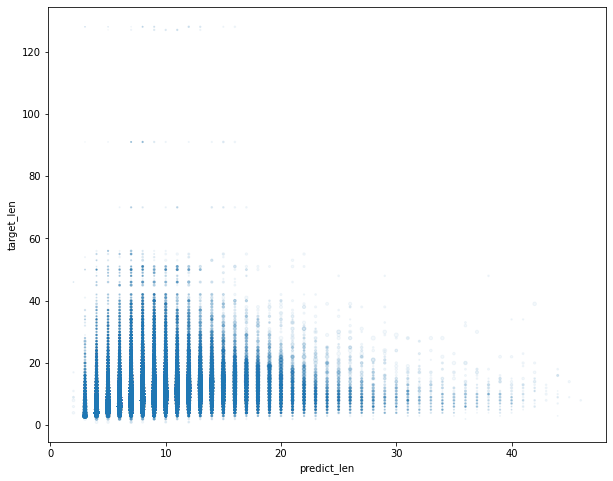

In [158]:
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'rougeL', 'use', 'bertscore-f1']
]

df['target_len'] = df.apply(lambda row: len(row['target'].split()), axis = 1)
df['predict_len'] = df.apply(lambda row: len(row['prediction'].split()), axis = 1)
print('target len:', df.target_len.mean())
print('predict len:', df.predict_len.mean())

df.plot(x='predict_len', y='target_len', s=df['rougeL'].apply(lambda x: x*20),
        kind='scatter', figsize=(10,8), alpha=0.05)

<ipython-input-159-9e9c3cf57784>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_len'] = df.apply(lambda row: len(row['target'].split()), axis = 1)
<ipython-input-159-9e9c3cf57784>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predict_len'] = df.apply(lambda row: len(row['prediction'].split()), axis = 1)


target len: 10.884452827552481
predict len: 8.860120856474204


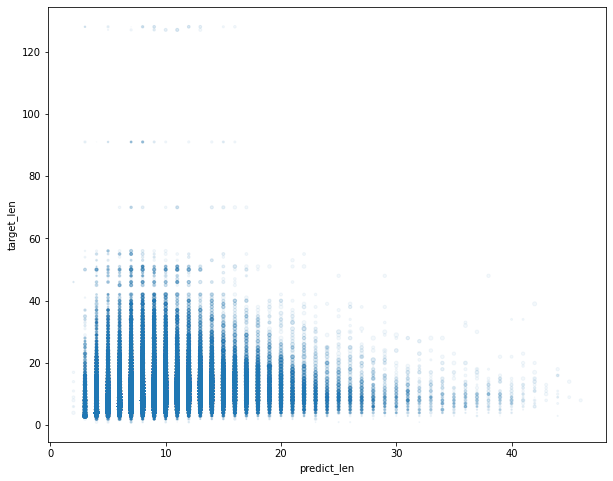

In [159]:
df = df_norm[
    ['nickname', 'context', 'target', 'prediction', 'rougeL', 'use']
]

df['target_len'] = df.apply(lambda row: len(row['target'].split()), axis = 1)
df['predict_len'] = df.apply(lambda row: len(row['prediction'].split()), axis = 1)
print('target len:', df.target_len.mean())
print('predict len:', df.predict_len.mean())

df.plot(x='predict_len', y='target_len', s=df['use'].apply(lambda x: x*20),
        kind='scatter', figsize=(10,8), alpha=0.05)

<ipython-input-161-bb27ba15aa78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_len'] = df.apply(lambda row: len(row['target'].split()), axis = 1)
<ipython-input-161-bb27ba15aa78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predict_len'] = df.apply(lambda row: len(row['prediction'].split()), axis = 1)


target len: 10.884452827552481
predict len: 8.860120856474204


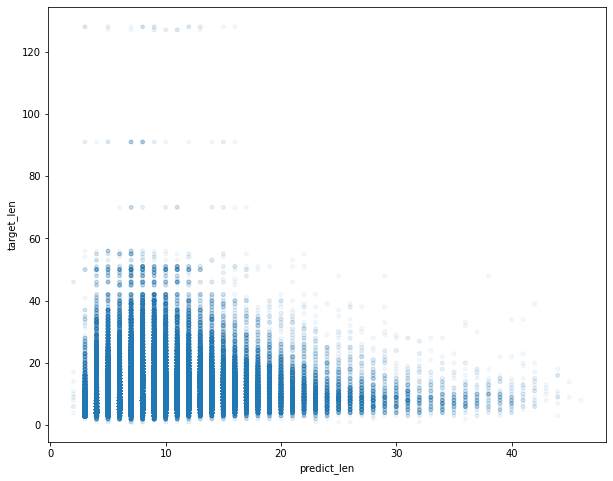

In [161]:
df = df_norm[
    ['target', 'prediction','bertscore-f1']
]

df['target_len'] = df.apply(lambda row: len(row['target'].split()), axis = 1)
df['predict_len'] = df.apply(lambda row: len(row['prediction'].split()), axis = 1)
print('target len:', df.target_len.mean())
print('predict len:', df.predict_len.mean())

df.plot(x='predict_len', y='target_len', s=df['bertscore-f1'].apply(lambda x: x*20),
        kind='scatter', figsize=(10,8), alpha=0.05)

### Plotting Baseline

In [ ]:
evaluation_db_df.groupby(['base_model', 'trained_on']).size()

base_model  trained_on
T5          amalgam       28629
            nq            28629
            quac          28629
            squad         28629
            triviaqa      28629
bart        amalgam       28629
            nq            28629
            quac          28629
            squad         28629
            triviaqa      28629
dtype: int64

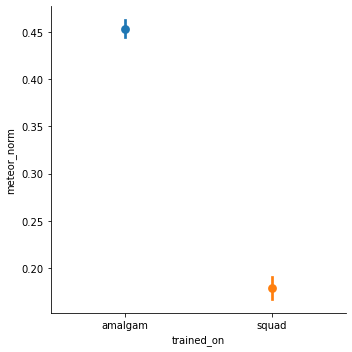

In [ ]:
df = df_norm[
    (df_norm.base_model == 'T5') &
    (df_norm.trained_on == 'squad') | (df_norm.trained_on == 'amalgam')
]

eval_cols = ['trained_on', 'bleu_norm', 'rougeL_norm', 'meteor_norm', 'bertscore_norm', 'use_norm']

df_plot = df[eval_cols]

sns.catplot(x='trained_on', y='meteor_norm', data=df_plot,
            kind='point', hue='trained_on')
  
# list(axes.flat)[0].remove()
plt.tight_layout()
plt.show()

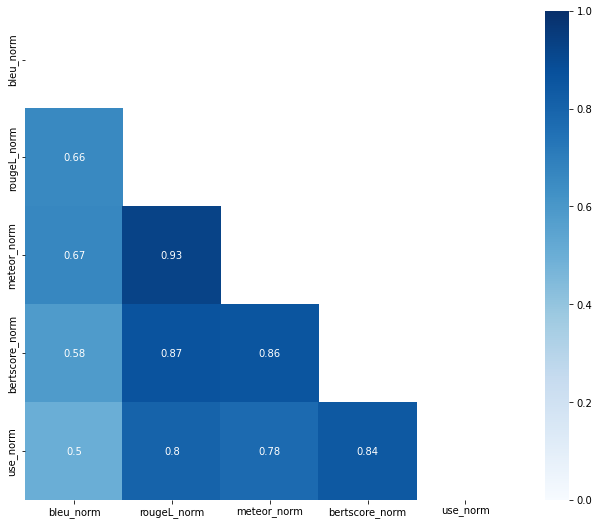

In [ ]:
df = df_norm[
    (df_norm.base_model == 'T5') &
    (df_norm.trained_on == 'squad')
]

eval_cols = ['bleu_norm', 'rougeL_norm', 'meteor_norm', 'bertscore_norm', 'use_norm']

df_plot = df[eval_cols]

corr = df_plot.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11,9))

sns.heatmap(corr, mask=mask, square=True, annot=True,
            cmap='Blues', vmin=0, vmax=1.0)

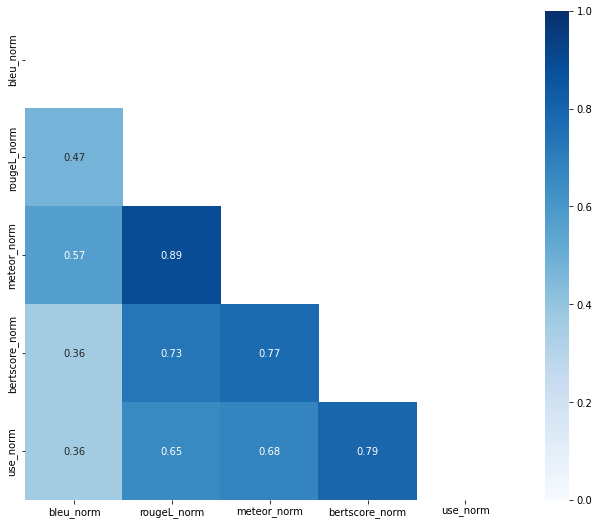

In [ ]:
df = df_norm[
    (df_norm.base_model == 'T5') &
    (df_norm.trained_on == 'quac')
]

eval_cols = ['bleu_norm', 'rougeL_norm', 'meteor_norm', 'bertscore_norm', 'use_norm']

df_plot = df[eval_cols]

corr = df_plot.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11,9))

sns.heatmap(corr, mask=mask, square=True, annot=True,
            cmap='Blues', vmin=0, vmax=1.0)

(28629, 17)
10.0%


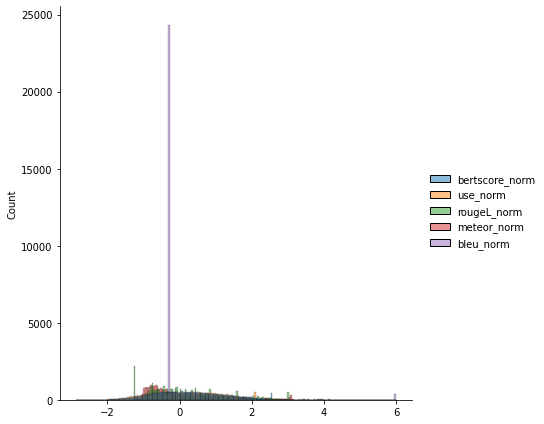

In [ ]:
# baseline model only

df = df_norm[
    (df_norm.base_model == 'T5') &
    (df_norm.trained_on == 'squad')
]


df_plot = df[
    ['bertscore_norm', 'use_norm', 'rougeL_norm', 'meteor_norm', 'bleu_norm']
]

print(df.shape)
print(f"{100 * (df.shape[0] / evaluation_db_df.shape[0])}%")



In [82]:
# baseline model only

df = df_norm[
    (df_norm.base_model == 'T5') &
    (df_norm.trained_on == 'squad')
]


df_plot = df[
    ['trained_on', 'bleu_norm', 'rougeL_norm', 'meteor_norm', 'bertscore_norm', 'use_norm']
]

print(df.shape)
print(f"{100 * (df.shape[0] / evaluation_db_df.shape[0])}%")

g = sns.catplot(data=df_plot, kind='box',
                # x='nickname', y='use',
                height=6.0, aspect=1.0)
# g.set(title='USE Performance by Model')

SyntaxError: ignored

(28629, 17)
10.0%


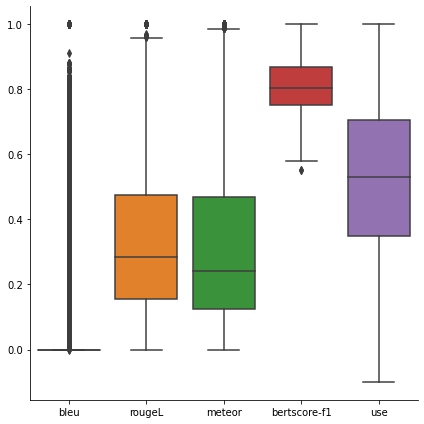

In [31]:
# baseline model only

df = df_norm[
    (df_norm.base_model == 'T5') &
    (df_norm.trained_on == 'squad')
]


df_plot = df[
    ['trained_on', 'bleu', 'rougeL', 'meteor', 'bertscore-f1', 'use']
]

print(df.shape)
print(f"{100 * (df.shape[0] / evaluation_db_df.shape[0])}%")

g = sns.catplot(data=df_plot, kind='box',
                # x='nickname', y='use',
                height=6.0, aspect=1.0)
# g.set(title='USE Performance by Model')

## METRICS DISTRIBUTION PLOT

(286290, 17)
100.0%


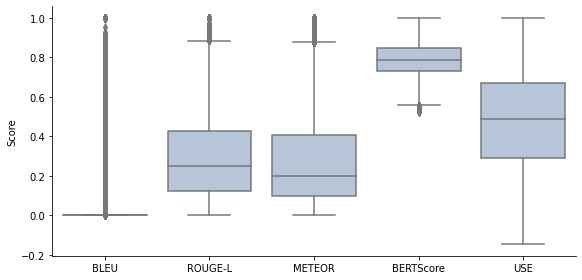

In [64]:
# baseline model only

df = df_norm.copy()


df_plot = df[
    ['trained_on', 'bleu', 'rougeL', 'meteor', 'bertscore-f1', 'use']
]

print(df.shape)
print(f"{100 * (df.shape[0] / evaluation_db_df.shape[0])}%")

g = sns.catplot(data=df_plot, kind='box', color='lightsteelblue',
                # x='nickname', y='use',
                height=4.0, aspect=2.0)
g.set_xticklabels(['BLEU', 'ROUGE-L', 'METEOR', 'BERTScore', 'USE'])
g.set(ylabel='Score')

# save file
plt.savefig('metric_distributions.png', bbox_inches='tight')

### USE on Models plot

(28629, 17)
10.0%


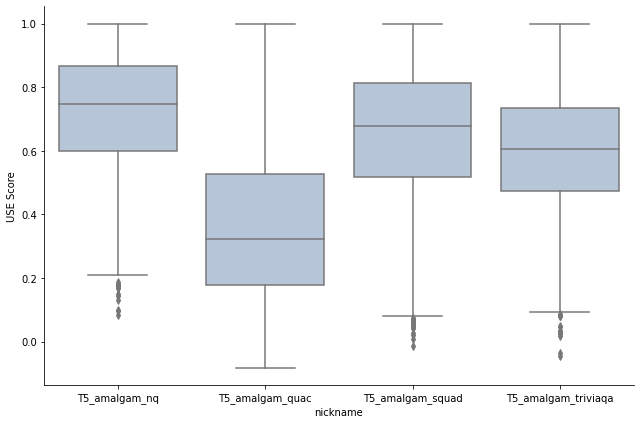

In [167]:
# baseline model only

df = df_norm[
    (df_norm.trained_on == 'amalgam') &
    (df_norm.base_model == 'T5')
]


df_plot = df[
    ['nickname', 'use']
]

print(df.shape)
print(f"{100 * (df.shape[0] / evaluation_db_df.shape[0])}%")

g = sns.catplot(data=df_plot, kind='box', color='lightsteelblue',
                x='nickname', y='use',
                height=6.0, aspect=1.5)
# g.set_xticklabels(['BLEU', 'ROUGE-L', 'METEOR', 'BERTScore', 'USE'])
g.set(ylabel='USE Score')

# save file
# plt.savefig('metric_distributions.png', bbox_inches='tight')

## QuAC Generalized Questions

In [ ]:
evaluation_db_df.head(2)

,prediction_set,base_model,trained_on,tested_on,nickname,hyperparameter,context,target,prediction,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,use
0,predictions.bart_base_pt_long.nq.nq.csv,bart,nq,nq,bart_nq_nq,{'defaults': True},"Following the unification of the Hejaz and Nejd kingdoms, the new state was named al-Mamlakah al-ʻArabīyah as-Suʻūdīyah (a transliteration of المملكة العربية السعودية in Arabic) by royal decree on 23 September 1932 by its founder, Abdulaziz Al Saud (Ibn Saud). Although this is normally translated as ""the Kingdom of Saudi Arabia"" in English,[24] it literally means ""the Saudi Arab kingdom"",[25] or ""the Arab Saudi Kingdom"".[26]",what was the real name of saudi arabia,what is the name of the kingdom of saudi arabia,0.000000,0.666667,0.375000,0.666667,0.666667,0.623306,0.910656,0.921063,0.915830,0.794086
1,predictions.bart_base_pt_long.nq.nq.csv,bart,nq,nq,bart_nq_nq,{'defaults': True},"This list contains the top ten pictures with the most likes on the social photo-sharing platform Instagram;[1] Instagram does not provide an official list. As of April 2018, the name announcement of Kylie Jenner's first child is the most-liked picture with over 17 million likes.[2][3] Additionally, Kylie Jenner has the most pictures in the top ten with four, including the top three overall. Most of Jenner's top pictures feature her newborn daughter, Stormi Webster.",whats the most liked picture on instagram 2018,what is the most liked picture on instagram,0.680375,0.750000,0.714286,0.750000,0.750000,0.864796,0.947524,0.917478,0.932259,0.884909


In [ ]:
df = evaluation_db_df[
    (evaluation_db_df.trained_on == 'quac')
]

# df.groupby(['tested_on', 'prediction']).size().sort_values(ascending=False)

# Metric Analysis



In [ ]:
evaluation_db_df.columns

Index(['prediction_set', 'base_model', 'trained_on', 'tested_on', 'nickname',
       'hyperparameter', 'target', 'prediction', 'bleu', 'rouge1', 'rouge2',
       'rougeL', 'rougeLsum', 'meteor', 'bertscore-precision',
       'bertscore-recall', 'bertscore-f1', 'bleurt', 'use'],
      dtype='object')

In [ ]:
use_metrics = [
    'rougeL',
    'bleu',
    'bleurt',
    'meteor',
    'bertscore-f1',
    'use'
]

keep_columns = [
    'nickname',
    'base_model',
    'trained_on',
    'tested_on',
    'target',
    'prediction'
] + use_metrics

In [ ]:
evaluation_db_df[keep_columns].head()

,nickname,base_model,trained_on,tested_on,target,prediction,rougeL,bleu,bleurt,meteor,bertscore-f1
0,T5_nq_nq,T5,nq,nq,what was the real name of saudi arabia,what is the name of the new saudi kingdom,0.588235,0.000000,0.172651,0.459259,0.909838
1,T5_nq_nq,T5,nq,nq,whats the most liked picture on instagram 2018,what is the most liked picture on instagram,0.750000,0.680375,0.334462,0.864796,0.932259
2,T5_nq_nq,T5,nq,nq,where does the movie proof of life take place,where does the movie adol take place,0.750000,0.367415,-0.815040,0.669192,0.910740
3,T5_nq_nq,T5,nq,nq,where is net profit on the balance sheet,where does net profit come from in a financial...,0.333333,0.000000,0.047884,0.311653,0.856129
4,T5_nq_nq,T5,nq,nq,when was fingerprinting first used by the police,when did fingerprint analysis become a common ...,0.125000,0.000000,0.092736,0.125000,0.824970


In [ ]:
cols = [
    'nickname',
    'base_model',
    'trained_on',
    'tested_on'
] + use_metrics

metric_df = evaluation_db_df[cols]
metric_df.head()

,nickname,base_model,trained_on,tested_on,rougeL,bleu,bleurt,meteor,bertscore-f1
0,T5_nq_nq,T5,nq,nq,0.588235,0.000000,0.172651,0.459259,0.909838
1,T5_nq_nq,T5,nq,nq,0.750000,0.680375,0.334462,0.864796,0.932259
2,T5_nq_nq,T5,nq,nq,0.750000,0.367415,-0.815040,0.669192,0.910740
3,T5_nq_nq,T5,nq,nq,0.333333,0.000000,0.047884,0.311653,0.856129
4,T5_nq_nq,T5,nq,nq,0.125000,0.000000,0.092736,0.125000,0.824970


# left off here

In [ ]:
evaluation_db_df.head(1)

,prediction_set,base_model,trained_on,tested_on,nickname,hyperparameter,target,prediction,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,bleurt,use
0,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},what was the real name of saudi arabia,what is the name of the new saudi kingdom,0.0,0.588235,0.133333,0.588235,0.588235,0.459259,0.907339,0.912351,0.909838,0.172651,0.750967


In [ ]:
default_hyp_rows = [row['defaults'] for row in evaluation_db_df.hyperparameter]
default_hyp_rows[:3]

[True, True, True]

In [ ]:
data_default_hyp = evaluation_db_df[default_hyp_rows]
print(data_default_hyp.shape)
data_default_hyp.head(2)

(286290, 19)


,prediction_set,base_model,trained_on,tested_on,nickname,hyperparameter,target,prediction,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,bleurt,use
0,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},what was the real name of saudi arabia,what is the name of the new saudi kingdom,0.000000,0.588235,0.133333,0.588235,0.588235,0.459259,0.907339,0.912351,0.909838,0.172651,0.750967
1,predictions.T5_base_pt_long.nq.nq.csv,T5,nq,nq,T5_nq_nq,{'defaults': True},whats the most liked picture on instagram 2018,what is the most liked picture on instagram,0.680375,0.750000,0.714286,0.750000,0.750000,0.864796,0.947524,0.917478,0.932259,0.334462,0.884909


In [ ]:
evaluation_metrics = ['bleu', 'rougeL', 'meteor', 'bertscore-f1', 'use', 'bleurt']
df = evaluation_db_df[default_hyp_rows]
df = df.groupby(["base_model", "trained_on", 'tested_on']).mean().round(decimals=2)
df

bleu  rouge1  rouge2  rougeL  rougeLsum  \
base_model trained_on tested_on                                            
T5         amalgam    nq         0.16    0.55    0.32    0.52       0.52   
                      quac       0.03    0.26    0.10    0.25       0.25   
                      squad      0.13    0.49    0.27    0.46       0.46   
                      triviaqa   0.06    0.41    0.19    0.35       0.35   
           nq         nq         0.16    0.54    0.32    0.52       0.52   
                      quac       0.00    0.15    0.03    0.15       0.15   
                      squad      0.01    0.36    0.14    0.33       0.33   
                      triviaqa   0.01    0.31    0.12    0.27       0.27   
           quac       nq         0.00    0.15    0.02    0.14       0.14   
                      quac       0.00    0.17    0.04    0.17       0.17   
                      squad      0.00    0.18    0.03    0.17       0.17   
                      triviaqa   0.00    0.12    0.01    0.12       0.12   
           squad      nq         0.01    0.43    0.21    0.41       0.41   
                      quac       0.01    0.19    0.05    0.18       0.18   
                      squad      0.13    0.48    0.27    0.45       0.45   
                      triviaqa   0.02    0.31    0.11    0.27       0.27   
           triviaqa   nq         0.01    0.32    0.13    0.27       0.27   
                      quac       0.00    0.11    0.02    0.10       0.10   
                      squad      0.03    0.29    0.11    0.24       0.24   
                      triviaqa   0.05    0.38    0.16    0.32       0.32   
bart       amalgam    nq         0.20    0.57    0.35    0.55       0.55   
                      quac       0.03    0.24    0.09    0.23       0.23   
                      squad      0.14    0.49    0.28    0.46       0.46   
                      triviaqa   0.08    0.44    0.22    0.37       0.37   
           nq         nq         0.20    0.58    0.36    0.55       0.55   
                      quac       0.00    0.15    0.03    0.15       0.15   
                      squad      0.01    0.35    0.14    0.32       0.32   
                      triviaqa   0.01    0.33    0.13    0.29       0.29   
           quac       nq         0.01    0.33    0.14    0.33       0.33   
                      quac       0.06    0.29    0.14    0.28       0.28   
                      squad      0.03    0.31    0.11    0.29       0.29   
                      triviaqa   0.01    0.22    0.06    0.20       0.20   
           squad      nq         0.01    0.43    0.21    0.41       0.41   
                      quac       0.01    0.19    0.05    0.18       0.18   
                      squad      0.15    0.50    0.29    0.47       0.47   
                      triviaqa   0.02    0.30    0.11    0.26       0.26   
           triviaqa   nq         0.01    0.40    0.20    0.37       0.37   
                      quac       0.00    0.12    0.03    0.11       0.11   
                      squad      0.05    0.35    0.14    0.31       0.31   
                      triviaqa   0.08    0.43    0.22    0.37       0.37   

                                 meteor  bertscore-precision  \
base_model trained_on tested_on                                
T5         amalgam    nq           0.49                 0.86   
                      quac         0.26                 0.79   
                      squad        0.45                 0.87   
                      triviaqa     0.33                 0.84   
           nq         nq           0.49                 0.86   
                      quac         0.11                 0.69   
                      squad        0.26                 0.80   
                      triviaqa     0.19                 0.79   
           quac       nq           0.08                 0.70   
                      quac         0.17                 0.77   
                      squad        0.13                 0.77   
        

In [ ]:
for metric in evaluation_metrics:
  print(metric)
  display(df[metric].sort_values(ascending=False)[:3])
  print('___________________')

In [ ]:
example = evaluation_db_df[['target', 'prediction', 'bleu', 'rougeL', 'use']].sample(1)
display(example.bleu.to_string())
display(example.rougeL.to_string())
display(example.use.to_string())
display([word for word in example.target])
display([word for word in example.prediction])

'173550    0.421395'

'173550    0.666667'

'173550    0.797535'

['who has the power to approve or veto legislation constitution']

['who has the power to veto a bill']

128717    0.425008  
128717    0.777778  
128717    0.742065  
['What battle outside Quebec City did British lose in 1760?']  
['What battle did the British lose in 1760?']  





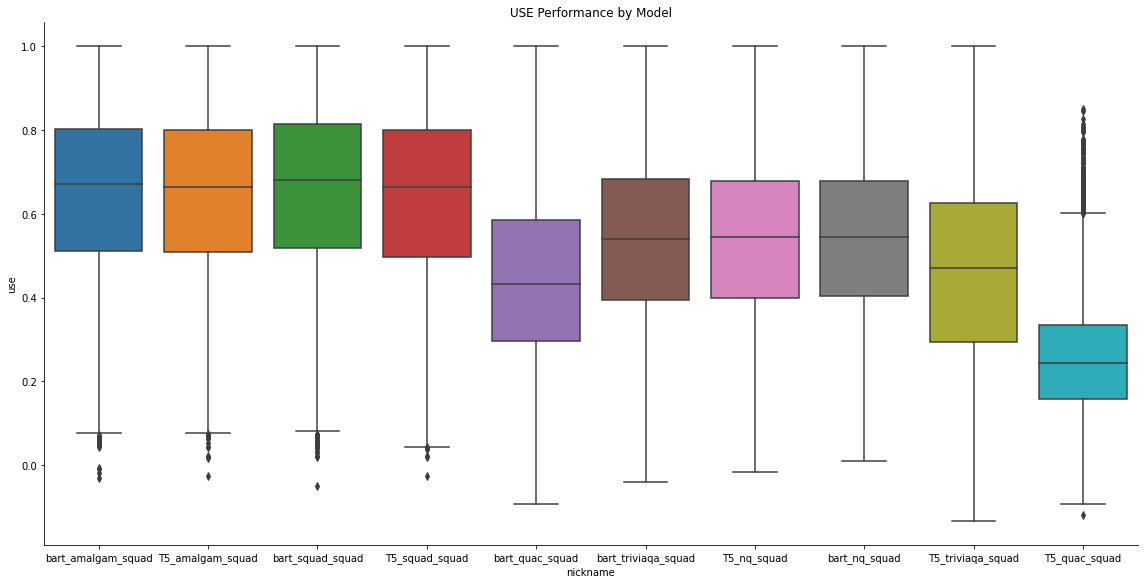

In [ ]:
data = data_default_hyp[data_default_hyp.tested_on == 'squad'].sort_values('use', ascending=False)
g = sns.catplot(data=data, kind='box',
                x='nickname', y='use',
                height=8.0, aspect=2.0)
g.set(title='USE Performance by Model')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


nickname
T5_amalgam_nq             AxesSubplot(0.1,0.15;0.8x0.75)
T5_amalgam_quac           AxesSubplot(0.1,0.15;0.8x0.75)
T5_amalgam_squad          AxesSubplot(0.1,0.15;0.8x0.75)
T5_amalgam_triviaqa       AxesSubplot(0.1,0.15;0.8x0.75)
T5_nq_nq                  AxesSubplot(0.1,0.15;0.8x0.75)
T5_nq_quac                AxesSubplot(0.1,0.15;0.8x0.75)
T5_nq_squad               AxesSubplot(0.1,0.15;0.8x0.75)
T5_nq_triviaqa            AxesSubplot(0.1,0.15;0.8x0.75)
T5_quac_nq                AxesSubplot(0.1,0.15;0.8x0.75)
T5_quac_quac              AxesSubplot(0.1,0.15;0.8x0.75)
T5_quac_squad             AxesSubplot(0.1,0.15;0.8x0.75)
T5_quac_triviaqa          AxesSubplot(0.1,0.15;0.8x0.75)
T5_squad_nq               AxesSubplot(0.1,0.15;0.8x0.75)
T5_squad_quac             AxesSubplot(0.1,0.15;0.8x0.75)
T5_squad_squad            AxesSubplot(0.1,0.15;0.8x0.75)
T5_squad_triviaqa         AxesSubplot(0.1,0.15;0.8x0.75)
T5_triviaqa_nq            AxesSubplot(0.1,0.15;0.8x0.75)
T5_triviaqa_quac      

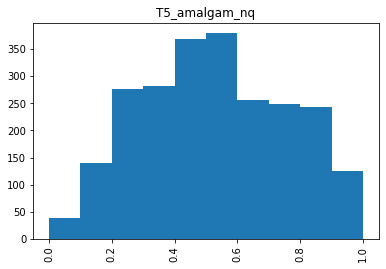

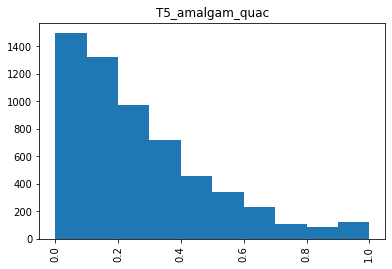

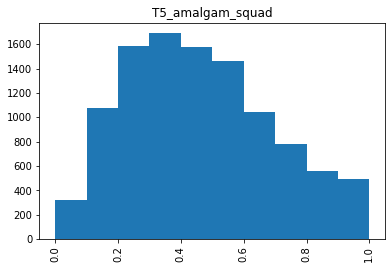

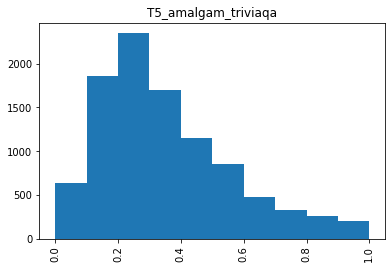

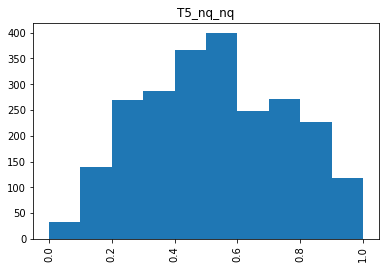

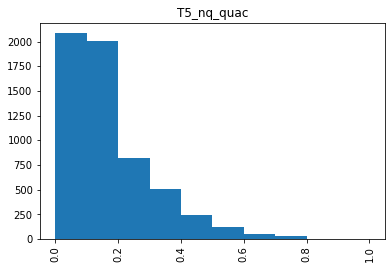

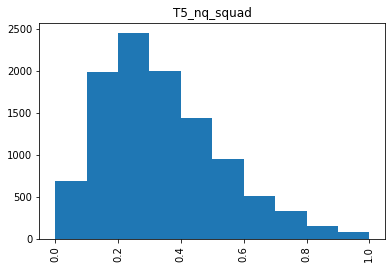

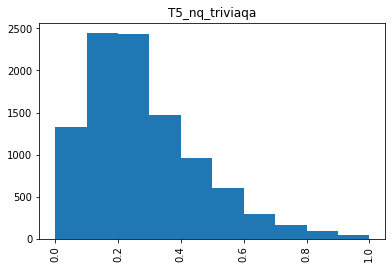

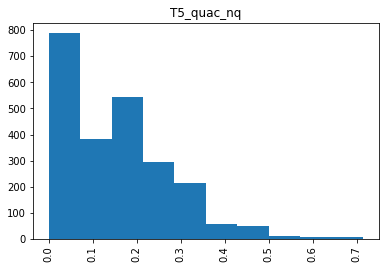

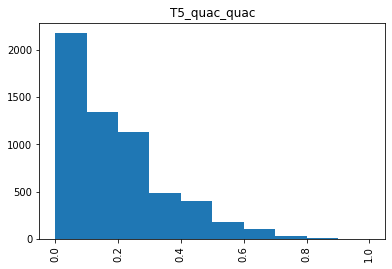

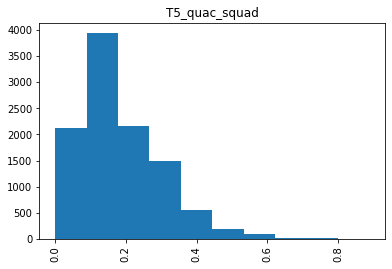

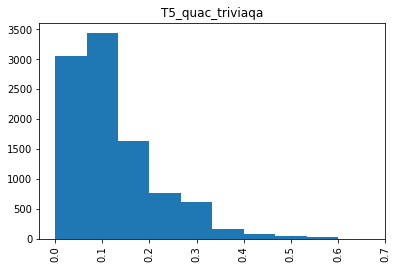

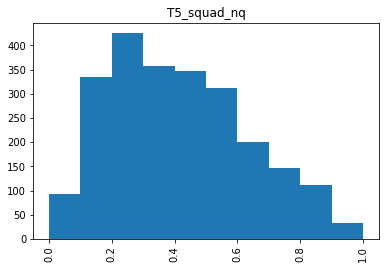

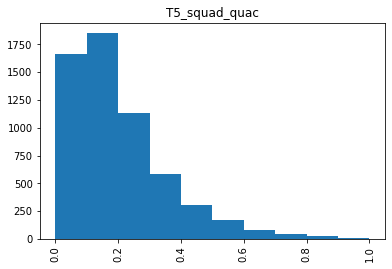

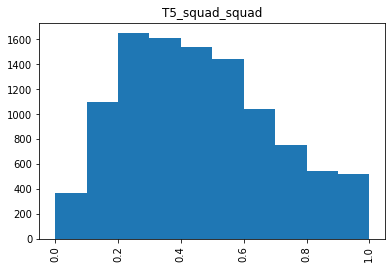

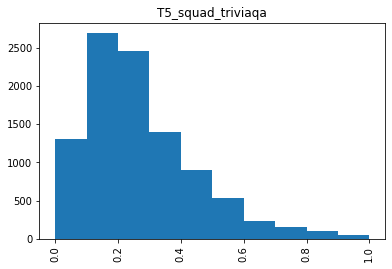

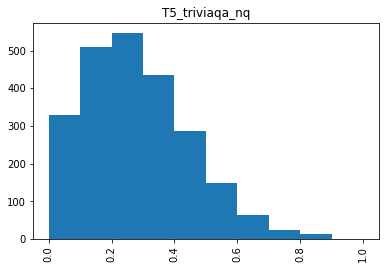

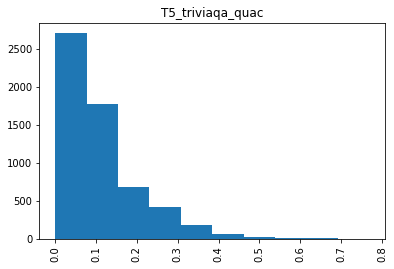

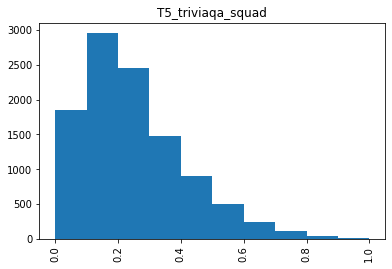

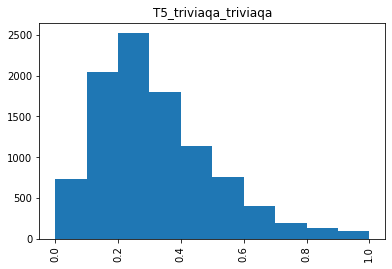

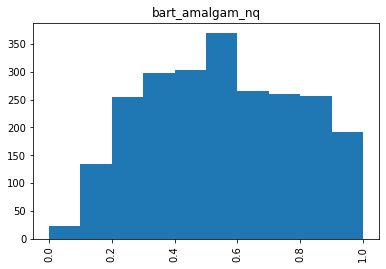

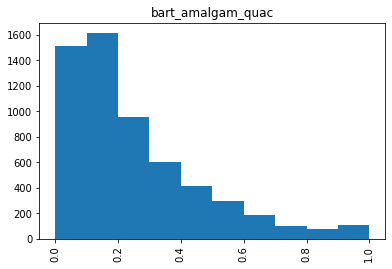

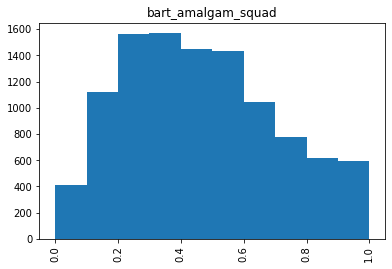

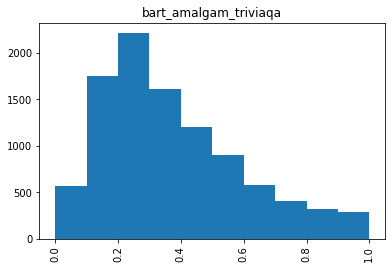

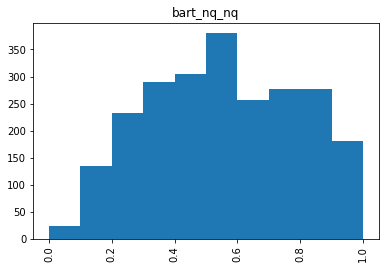

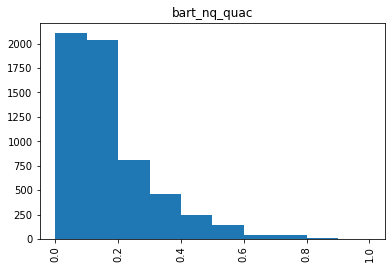

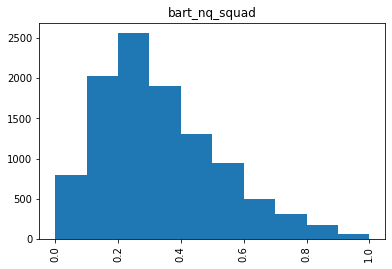

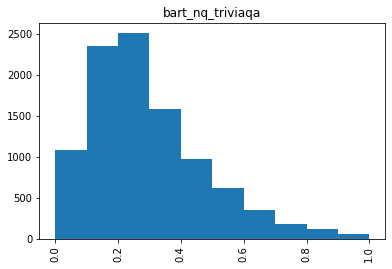

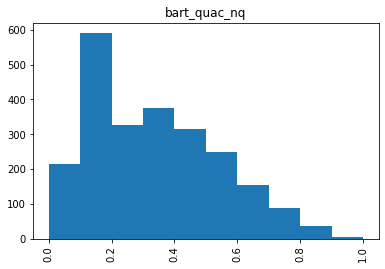

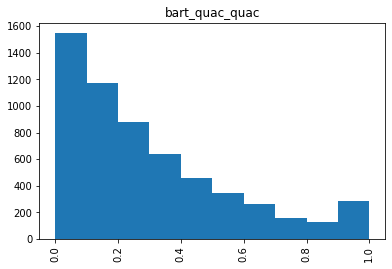

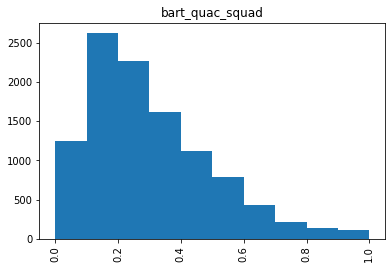

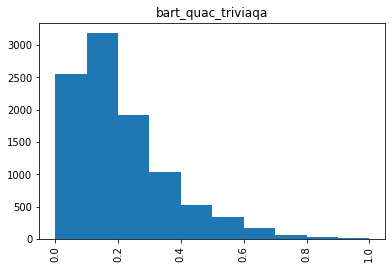

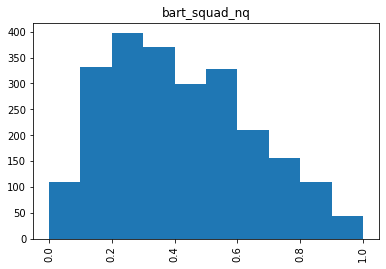

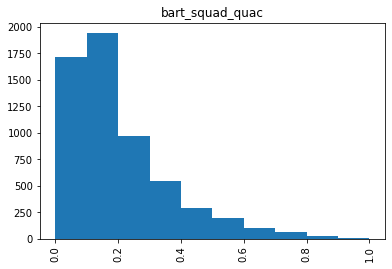

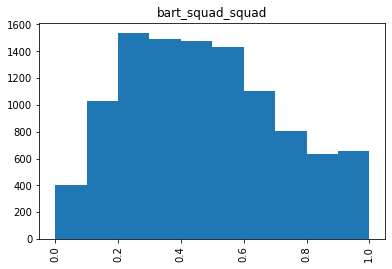

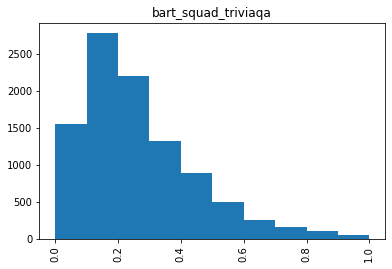

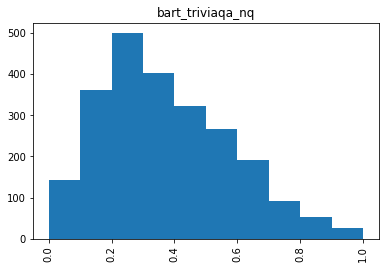

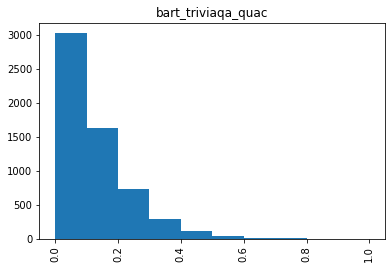

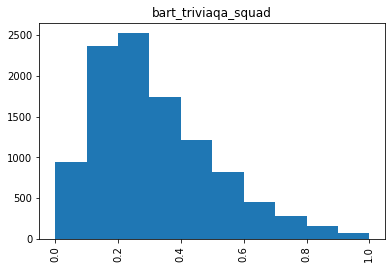

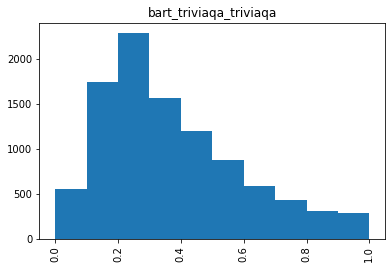

In [ ]:
# rouge_fig = value_df[['nickname', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum']]\
#               .set_index('nickname')\
#               .sort_values(by='rougeL', ascending=False)\
#               .plot.bar(figsize=(15,10),
#                       title='ROUGE Scores')\
#               .get_figure()

metric_df[['nickname', 'trained_on', 'tested_on', 'rougeL']]\
    .groupby('nickname')\
    .hist(by='nickname')

# Analyze

## Trained & Tested on Same Dataset

### SQuAD - SQuAD

Analyzing models trained and tested on SQuAD 

In [ ]:
squad_squad_df = evaluation_db_df[(evaluation_db_df.trained_on == 'squad') &
                                  (evaluation_db_df.tested_on == 'squad')]
squad_squad_df.groupby('nickname').mean()

,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,bleurt,use
nickname,,,,,,,,,,,
T5_squad_squad,0.132327,0.484151,0.268397,0.452071,0.452071,0.455496,0.871368,0.859774,0.864928,-0.318672,0.642209
bart_squad_squad,0.151242,0.503420,0.290294,0.469189,0.469189,0.475335,0.875216,0.865097,0.869541,-0.266942,0.657066
bart_squad_squad_hyp,0.151779,0.503688,0.290672,0.469289,0.469289,0.475808,0.875209,0.865159,0.869578,-0.264393,0.656853


### TriviaQA - TriviaQA

In [ ]:
triviaqa_triviaqa_df = value_df[(value_df.trained_on == 'triviaqa') &
                                (value_df.tested_on == 'triviaqa')]
triviaqa_triviaqa_df

,filename,rouge1,rouge2,rougeL,rougeLsum,bleurt,base_model,trained_on,tested_on,nickname
15,predictions.T5_base_pt_long.triviaqa.triviaqa.csv,"[0.12903225806451615, 0.37499999999999994, 0.2...","[0.0, 0.0, 0.052631578947368425, 0.0, 0.0, 0.2...","[0.12903225806451615, 0.37499999999999994, 0.1...","[0.12903225806451615, 0.37499999999999994, 0.1...",NaN,T5_base_pt_long,triviaqa,triviaqa,T5_triviaqa_triviaqa
31,predictions.bart_base_pt_long.triviaqa.triviaq...,"[0.4761904761904762, 0.7058823529411764, 0.294...","[0.2105263157894737, 0.26666666666666666, 0.12...","[0.380952380952381, 0.3529411764705882, 0.2941...","[0.380952380952381, 0.3529411764705882, 0.2941...",NaN,bart_base_pt_long,triviaqa,triviaqa,bart_triviaqa_triviaqa


### QUAC - QUAC

In [ ]:
quac_quac_df = value_df[(value_df.trained_on == 'quac') &
                        (value_df.tested_on == 'quac')]
quac_quac_df

,filename,rouge1,rouge2,rougeL,rougeLsum,bleurt,base_model,trained_on,tested_on,nickname
13,predictions.T5_base_pt_long.quac.quac.csv,"[0.0, 0.15384615384615385, 0.5454545454545454,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.15384615384615385, 0.36363636363636365...","[0.0, 0.15384615384615385, 0.36363636363636365...",NaN,T5_base_pt_long,quac,quac,T5_quac_quac
21,predictions.bart_base_pt_long.quac.quac.csv,"[0.13333333333333333, 0.15384615384615385, 0.6...","[0.0, 0.0, 0.4, 0.5454545454545454, 0.0, 0.5, ...","[0.13333333333333333, 0.15384615384615385, 0.6...","[0.13333333333333333, 0.15384615384615385, 0.6...",NaN,bart_base_pt_long,quac,quac,bart_quac_quac


### NQ - NQ

In [ ]:
nq_nq_df = value_df[(value_df.trained_on == 'nq') &
                    (value_df.tested_on == 'nq')]
nq_nq_df

## Trained & Tested on Different Datasets

### Tested on SQuAD

In [ ]:
on_squad_df = evaluation_db_df[evaluation_db_df.tested_on == 'squad']
on_squad_df.groupby('nickname').mean().sort_values('bleurt', ascending=False)

,bleu,rouge1,rouge2,rougeL,rougeLsum,meteor,bertscore-precision,bertscore-recall,bertscore-f1,bleurt,use
nickname,,,,,,,,,,,
bart_squad_squad_hyp,0.151779,0.503688,0.290672,0.469289,0.469289,0.475808,0.875209,0.865159,0.869578,-0.264393,0.656853
bart_squad_squad,0.151242,0.503420,0.290294,0.469189,0.469189,0.475335,0.875216,0.865097,0.869541,-0.266942,0.657066
bart_amalgam_squad,0.135813,0.493323,0.279320,0.458580,0.458580,0.460135,0.869009,0.857904,0.862851,-0.308066,0.650529
bart_amalgam_squad_hyp,0.136570,0.493769,0.280218,0.458923,0.458923,0.460821,0.868919,0.858098,0.862914,-0.309597,0.650290
T5_squad_squad,0.132327,0.484151,0.268397,0.452071,0.452071,0.455496,0.871368,0.859774,0.864928,-0.318672,0.642209
T5_amalgam_squad,0.125223,0.487697,0.268768,0.455174,0.455174,0.453043,0.869129,0.856250,0.862051,-0.326483,0.646733
bart_triviaqa_squad_hyp,0.048826,0.353030,0.143065,0.312350,0.312350,0.339249,0.810325,0.825285,0.817091,-0.642930,0.535714
bart_triviaqa_squad,0.047025,0.350678,0.141848,0.310408,0.310408,0.338206,0.809761,0.825226,0.816754,-0.645397,0.535181
bart_nq_squad_hyp,0.014450,0.349272,0.139509,0.322950,0.322950,0.252300,0.797757,0.771389,0.784065,-0.762538,0.540785


### Tested on TriviaQA

In [ ]:
on_triviaqa_df = value_df[value_df.tested_on == 'triviaqa']
on_triviaqa_df

### Tested on QuAC

In [ ]:
on_quac_df = value_df[value_df.tested_on == 'quac']
on_quac_df

### Tested on NQ

In [ ]:
on_nq_df = value_df[value_df.tested_on == 'nq']
on_nq_df

## Top Performers by Metric

In [ ]:
top_X_performers = 10

metrics = [
    # 'rouge1',
    # 'rouge2',
    'rougeL',
    'meteor',
    'bleurt',
    # 'bertscore-precision',
    # 'bertscore-recall',
    'bertscore-f1'
]

In [ ]:
print(f"Printing top {top_X_performers} performers...\n")

for met in metrics:
  tops = value_df.sort_values(by=met, ascending=False)[['nickname', 'trained_on', 'tested_on', met]]\
                   .head(top_X_performers)
  print(met + ':\n', tops, '\n')

Printing top 10 performers...

rougeL:
               nickname trained_on tested_on  \
32     bart_amalgam_nq    amalgam        nq   
28    bart_triviaqa_nq   triviaqa        nq   
11          T5_quac_nq       quac        nq   
24          bart_nq_nq         nq        nq   
18    bart_squad_squad      squad     squad   
7       T5_squad_squad      squad     squad   
33       T5_amalgam_nq    amalgam        nq   
20        bart_quac_nq       quac        nq   
38  bart_amalgam_squad    amalgam     squad   
0             T5_nq_nq         nq        nq   

                                               rougeL  
32  [0.75, 0.75, 0.7058823529411765, 0.375, 0.25, ...  
28  [0.7368421052631579, 0.11111111111111112, 0.15...  
11  [0.6666666666666666, 0.0, 0.0, 0.1176470588235...  
24  [0.6666666666666665, 0.75, 0.47058823529411764...  
18  [0.6666666666666665, 0.3333333333333333, 0.285...  
7   [0.631578947368421, 0.26666666666666666, 0.285...  
33  [0.625, 0.75, 0.7058823529411765, 0.3333333333

# Plotting

## Metric Averages

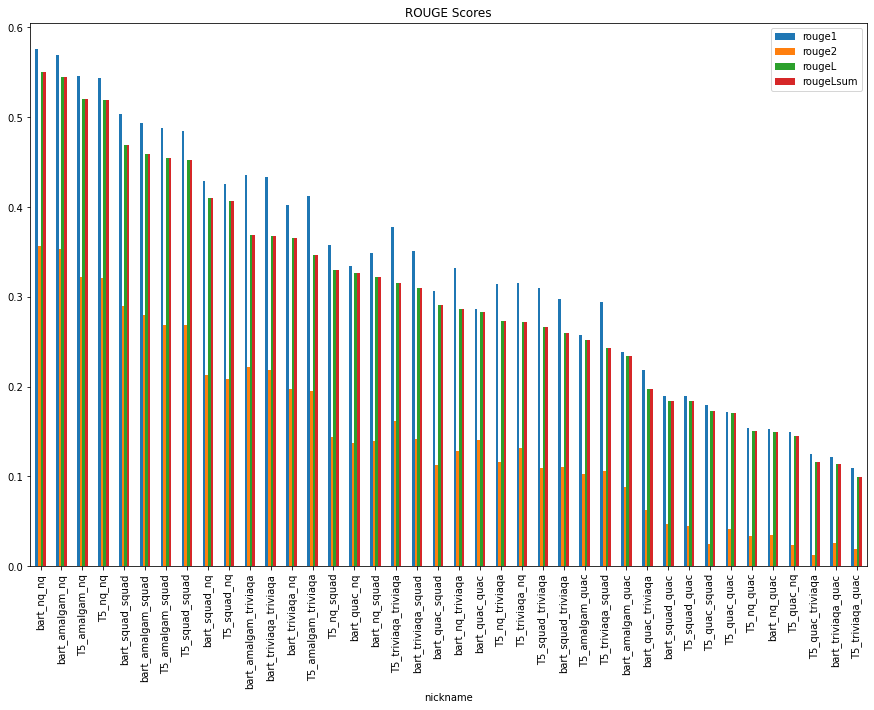

In [ ]:
rouge_fig = value_df[['nickname', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum']]\
              .set_index('nickname')\
              .sort_values(by='rougeL', ascending=False)\
              .plot.bar(figsize=(15,10),
                      title='ROUGE Scores')\
              .get_figure()
rouge_fig

plot_name = join(inference_root, "rouge.png")
rouge_fig.savefig(plot_name, bbox_inches='tight')

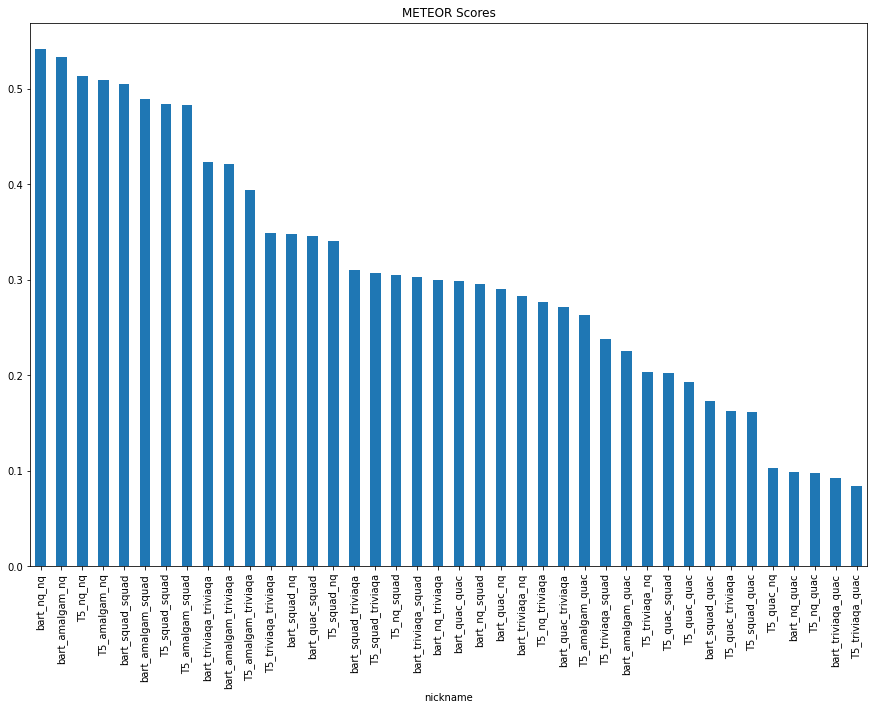

In [ ]:
meteor_fig = value_df[['nickname', 'meteor']]\
              .set_index('nickname')\
              .sort_values(by='meteor', ascending=False)\
              .plot.bar(figsize=(15,10),
                      title='METEOR Scores',
                      legend=False)\
              .get_figure()
meteor_fig

plot_name = join(inference_root, "meteor.png")
meteor_fig.savefig(plot_name, bbox_inches='tight')

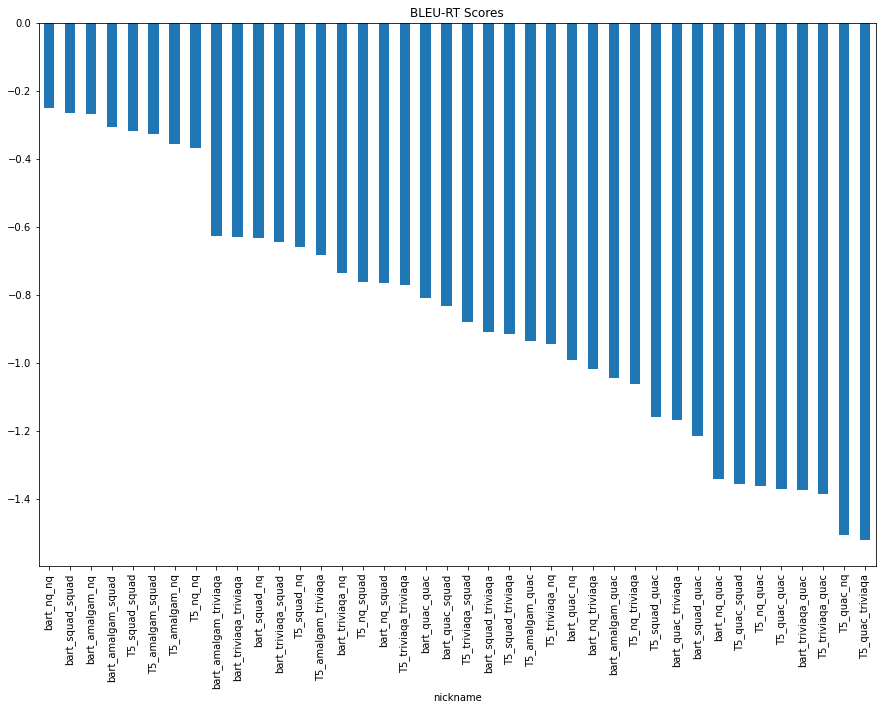

In [ ]:
bleurt_fig = value_df[['nickname', 'bleurt']]\
              .set_index('nickname')\
              .sort_values(by='bleurt', ascending=False)\
              .plot.bar(figsize=(15,10),
                        title='BLEU-RT Scores',
                        legend=False)\
              .get_figure()

bleurt_fig

plot_name = join(inference_root, "bleurt.png")
bleurt_fig.savefig(plot_name, bbox_inches='tight')

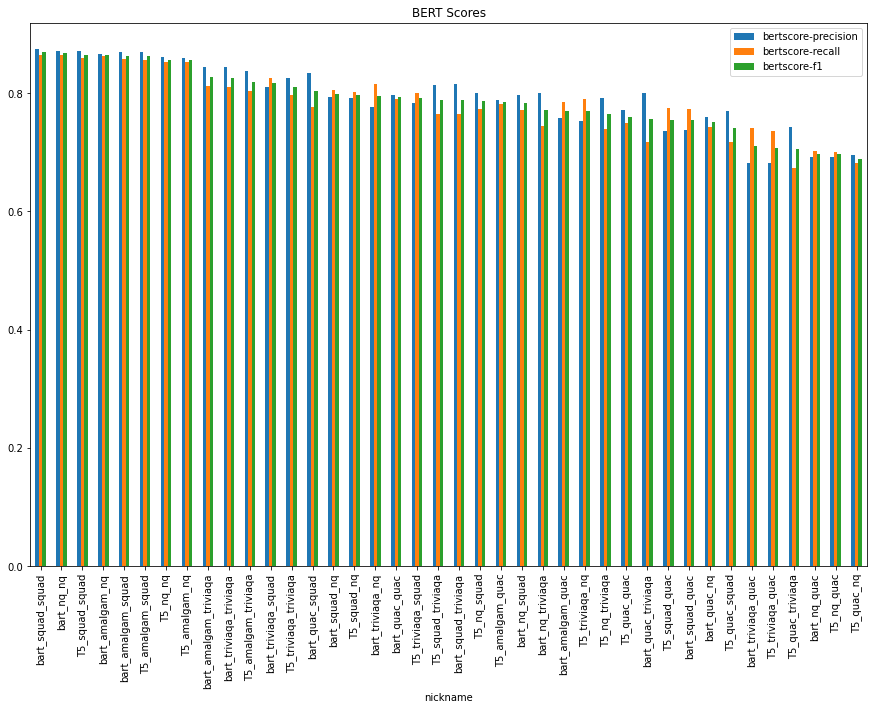

In [ ]:
bertscore_fig = value_df[['nickname', 'bertscore-precision', 'bertscore-recall', 'bertscore-f1']]\
                  .set_index('nickname')\
                  .sort_values(by='bertscore-f1', ascending=False)\
                  .plot.bar(figsize=(15,10),
                            title='BERT Scores')\
                  .get_figure()
bertscore_fig

plot_name = join(inference_root, "bertscore.png")
bertscore_fig.savefig(plot_name, bbox_inches='tight')